In [1]:
from myctgan import CTGAN
from data_transformer import DataTransformer
from data_sampler import DataSampler
from train import Train
import numpy as np
import tensorflow as tf
import pandas as pd
from prepare_data import preprocess_data_czech
import random

2024-01-26 15:21:53.664997: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
df = pd.read_csv('../DATA/tr_by_acct_w_age.csv')
print('preprocessing data....')
raw_data, LOG_AMOUNT_SCALE, TD_SCALE = preprocess_data_czech(df)
raw = raw_data.copy()
final_raw = raw[['log_amount_sc', 'tcode', 'td', 'day', 'dow', 'dtme', 'month']]


preprocessing data....


In [3]:
final_raw

,log_amount_sc,tcode,td,day,dow,dtme,month
0,2.823750,CREDIT__CREDIT IN CASH__nan,0.0,24,4,7,3
1,3.355869,CREDIT__COLLECTION FROM ANOTHER BANK__nan,20.0,13,3,17,4
2,3.858949,CREDIT__CREDIT IN CASH__nan,10.0,23,6,7,4
3,1.228484,CREDIT__nan__INTEREST CREDITED,7.0,30,6,0,4
4,3.355869,CREDIT__COLLECTION FROM ANOTHER BANK__nan,13.0,13,5,18,5
...,...,...,...,...,...,...,...
1056315,4.148672,DEBIT__CASH WITHDRAWAL__nan,2.0,2,2,29,12
1056316,4.390393,CREDIT__COLLECTION FROM ANOTHER BANK__nan,8.0,10,3,21,12
1056317,3.575677,DEBIT__CASH WITHDRAWAL__nan,15.0,25,4,6,12
1056318,2.347677,CREDIT__nan__INTEREST CREDITED,6.0,31,3,0,12


In [4]:
transformer = DataTransformer(date_transformation='clock')

2024-01-26 15:22:50.931909: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-01-26 15:22:50.933334: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-01-26 15:22:50.965429: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2024-01-26 15:22:50.965610: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:af:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2024-01-26 15:22:50.965623: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-01-26 15:2

In [5]:
transformer.fit(final_raw, discrete_columns=('tcode'), date_columns=('day', 'dow', 'dtme', 'month')) 

In [6]:
transformer.output_info_list

[[SpanInfo(dim=1, activation_fn='tanh'),
  SpanInfo(dim=10, activation_fn='softmax')],
 [SpanInfo(dim=16, activation_fn='softmax')],
 [SpanInfo(dim=1, activation_fn='tanh'),
  SpanInfo(dim=9, activation_fn='softmax')],
 [SpanInfo(dim=2, activation_fn='tanh')],
 [SpanInfo(dim=2, activation_fn='tanh')],
 [SpanInfo(dim=2, activation_fn='tanh')],
 [SpanInfo(dim=2, activation_fn='tanh')]]

In [7]:
transformer.output_dimensions

45

In [8]:
transformer._column_transform_info_list

[ColumnTransformInfo(column_name='log_amount_sc', column_type='continuous', transform=ClusterBasedNormalizer(model_missing_values=True), output_info=[SpanInfo(dim=1, activation_fn='tanh'), SpanInfo(dim=10, activation_fn='softmax')], output_dimensions=11),
 ColumnTransformInfo(column_name='tcode', column_type='discrete', transform=OneHotEncoder(), output_info=[SpanInfo(dim=16, activation_fn='softmax')], output_dimensions=16),
 ColumnTransformInfo(column_name='td', column_type='continuous', transform=ClusterBasedNormalizer(model_missing_values=True), output_info=[SpanInfo(dim=1, activation_fn='tanh'), SpanInfo(dim=9, activation_fn='softmax')], output_dimensions=10),
 ColumnTransformInfo(column_name='day', column_type='date', transform=None, output_info=[SpanInfo(dim=2, activation_fn='tanh')], output_dimensions=2),
 ColumnTransformInfo(column_name='dow', column_type='date', transform=None, output_info=[SpanInfo(dim=2, activation_fn='tanh')], output_dimensions=2),
 ColumnTransformInfo(colu

In [9]:
data_t  = transformer.transform(final_raw)                #matrix of transformed data



In [10]:
data_t.shape

(1056320, 45)

do not run

In [11]:
# Pickling the object and saving to a file
import pickle
with open('transformerobject.pkl', 'wb') as file:
    pickle.dump(transformer, file)

with open('transformed_data.pkl', 'wb') as file:
    pickle.dump(data_t, file)

In [12]:
import pickle
# Reading the object back from the file
with open('transformerobject.pkl', 'rb') as file:
    transformer = pickle.load(file)

with open('transformed_data.pkl', 'rb') as file:
    data_t = pickle.load(file)




In [13]:
output_info = transformer.output_info_list

In [14]:
output_info

[[SpanInfo(dim=1, activation_fn='tanh'),
  SpanInfo(dim=10, activation_fn='softmax')],
 [SpanInfo(dim=16, activation_fn='softmax')],
 [SpanInfo(dim=1, activation_fn='tanh'),
  SpanInfo(dim=9, activation_fn='softmax')],
 [SpanInfo(dim=2, activation_fn='tanh')],
 [SpanInfo(dim=2, activation_fn='tanh')],
 [SpanInfo(dim=2, activation_fn='tanh')],
 [SpanInfo(dim=2, activation_fn='tanh')]]

In [13]:
data_t.shape

(1056320, 45)

In [16]:
account_id_counts = raw_data['account_id'].value_counts().sort_index()
trans_sizes = np.array(account_id_counts)
assert sum(trans_sizes) == data_t.shape[0]
transactions = np.split(data_t, np.cumsum(trans_sizes)[:-1])   #transactions is the list of arrays, each array is for an individual customer 


log_frequency = True
sampler = DataSampler(data_t, transactions, output_info, log_frequency)

model = CTGAN()
generator  = model.make_generator(sampler, transformer)
discriminator = model.make_discriminator(sampler, transformer)

train = Train(transformer, sampler, generator, discriminator, epochs=2)
experiment_name = 'exp_ctgan_transformer_exp2'
#train.train(raw_data, experiment_name)

In [17]:
import datetime
optimizerG = tf.keras.optimizers.Adam(learning_rate = train._generator_lr, beta_1=0.5, beta_2=0.9, decay = train._generator_decay)
optimizerD = tf.keras.optimizers.Adam(learning_rate = train._discriminator_lr, beta_1=0.5, beta_2=0.9, decay = train._discriminator_decay)
        
csv_file = '../DATA/' + experiment_name + '_losses' +'.csv'
results_df = pd.DataFrame(columns=['Generator Loss', 'Discriminator Loss_average', 'Discriminator Loss_fake', 'Discriminator Loss_real',
                                    'Cross Entropy', 'Gradient Penalty'])

mean = tf.zeros(shape=(train._batch_size, train._embedding_dim), dtype=tf.float32)
std = mean + 1
steps_per_epoch = max(len(raw_data)// train._batch_size, 1)

data_dim = train._transformer.output_dimensions
dim_cond_vec = train._sampler.dim_cond_vec()
#dim of the input to discriminator
input_dim = data_dim + dim_cond_vec
pacdim = input_dim * train.pac
print('start of training')
for i in range(train._epochs):
    epoch_start = datetime.datetime.now()
    for id_ in range(steps_per_epoch):
        # step_per_epoch_start = datetime.now()
        for n in range(train._discriminator_steps):
            fakez = tf.random.normal(shape=(train._batch_size, train._embedding_dim), mean=mean, stddev=std)
            condvec = train._sampler.sample_condvec(train._batch_size)
            if condvec is None:
                c1, m1, col, opt = None, None, None, None
                real = train._sampler.sample_data(train._batch_size, col, opt)
            else:
                c1, m1, col, opt = condvec
                c1 = tf.convert_to_tensor(np.array(c1))
                c1 = tf.cast(c1, dtype=tf.float32)
                #c1 = tf.identity(c1, name=None) # Optional, just to ensure a new tensor is created

                m1 = tf.convert_to_tensor(np.array(m1))
                m1 = tf.cast(m1, dtype=tf.int32)
                #m1 = tf.identity(m1, name=None) # Optional, just to ensure a new tensor is created
                fakez = tf.concat([fakez, c1], axis=1)

                perm = np.arange(train._batch_size)
                np.random.shuffle(perm)
                real = train._sampler.sample_data(train._batch_size, col[perm], opt[perm])
                c2 = tf.gather(c1, indices=perm)
                
            fake = train.generator(fakez)
            fakeact = train._apply_activate(fake)

            if c1 is not None:
                fake_cat = tf.concat([fakeact, c1], axis=1)
                real_cat = tf.concat([real, c2], axis=1)
            else:
                fake_cat = fakeact
                real_cat = real

            # reshape the data for packed discriminator
            fake_cat_disc = tf.reshape(fake_cat,[-1, pacdim])
            real_cat_disc = tf.reshape(real_cat, [-1, pacdim])

            with tf.GradientTape() as tape:
                y_fake = train.discriminator(fake_cat_disc, training=True)
                y_real = train.discriminator(real_cat_disc, training=True)
                pen = train.calc_gradient_penalty(real_cat, fake_cat, 1)
                loss_d = -(tf.reduce_mean(y_real) - tf.reduce_mean(y_fake)) + pen
                loss_d_real = -tf.reduce_mean(y_real)
                loss_d_fake = tf.reduce_mean(y_fake)
            grads_disc = tape.gradient(loss_d, train.discriminator.trainable_variables)
            optimizerD.apply_gradients(zip(grads_disc, train.discriminator.trainable_variables))

        fakez = tf.random.normal(shape=(train._batch_size, train._embedding_dim), mean=mean, stddev=std)
        condvec = train._sampler.sample_condvec(train._batch_size)
        if condvec is None:
            c1, m1, col, opt = None, None, None, None
            
        else:
            c1, m1, col, opt = condvec
            c1 = tf.convert_to_tensor(np.array(c1))
            c1 = tf.cast(c1, dtype=tf.float32)

            m1 = tf.convert_to_tensor(np.array(m1))
            m1 = tf.cast(m1, dtype=tf.int32)
        
            fakez = tf.concat([fakez, c1], axis=1)

        with tf.GradientTape() as tape:
            fake = train.generator(fakez)
            fakeact = train._apply_activate(fake)

            if c1 is not None:
                fake_temp = tf.concat([fakeact, c1], axis=1)
                y_fake = train.discriminator(tf.reshape(fake_temp,[-1, pacdim]))
            else: 
                y_fake = train.discriminator(tf.reshape(fakeact,[-1, pacdim]))

            if condvec is None:
                cross_entropy = 0
            else:
                output_info = train._transformer.output_info_list
                cross_entropy = train.cross_entropy_loss(fake, c1, m1, output_info)
                

start of training


2024-01-26 15:29:17.574459: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


In [18]:
output_info

[[SpanInfo(dim=1, activation_fn='tanh'),
  SpanInfo(dim=10, activation_fn='softmax')],
 [SpanInfo(dim=16, activation_fn='softmax')],
 [SpanInfo(dim=1, activation_fn='tanh'),
  SpanInfo(dim=9, activation_fn='softmax')],
 [SpanInfo(dim=2, activation_fn='tanh')],
 [SpanInfo(dim=2, activation_fn='tanh')],
 [SpanInfo(dim=2, activation_fn='tanh')],
 [SpanInfo(dim=2, activation_fn='tanh')]]

In [22]:
amt_dim = output_info[0][1].dim + 1


In [23]:
labels = real_cat[:, 1:amt_dim]
logits = fake[:,1:amt_dim]
tmp = tf.nn.softmax_cross_entropy_with_logits(
                        labels,
                        logits)

In [25]:
tf.reduce_mean(tmp)

<tf.Tensor: shape=(), dtype=float32, numpy=2.3365982>

: 

In [24]:
real_cat[:,:1]

<tf.Tensor: shape=(700, 1), dtype=float32, numpy=
array([[-3.84473622e-01],
       [ 1.37967646e-01],
       [-3.20167691e-01],
       [-2.38975212e-01],
       [ 2.88738579e-01],
       [-4.29493755e-01],
       [ 1.15298191e-02],
       [-3.82580966e-01],
       [-5.21801934e-02],
       [-1.15965754e-02],
       [-3.66249740e-01],
       [ 3.51832867e-01],
       [ 1.85154080e-01],
       [-5.45931421e-02],
       [ 2.13731840e-01],
       [ 1.11467578e-01],
       [ 2.11132541e-01],
       [ 6.87695853e-03],
       [-3.82580966e-01],
       [-2.21238345e-01],
       [ 4.14293438e-01],
       [-2.27614678e-03],
       [-1.88978836e-02],
       [-1.67156518e-01],
       [ 2.01965511e-01],
       [-1.09027453e-01],
       [ 7.27661490e-01],
       [-3.72029930e-01],
       [-8.08433294e-02],
       [ 9.18942094e-02],
       [-1.87929235e-02],
       [-2.56639808e-01],
       [-7.62097072e-04],
       [ 3.90691683e-02],
       [-2.97655500e-02],
       [-1.36648118e-01],
       [-1.206

In [25]:
fake[:,:1]

<tf.Tensor: shape=(700, 1), dtype=float32, numpy=
array([[ 2.54375696e-01],
       [ 4.86970603e-01],
       [ 5.43607593e-01],
       [ 8.22920799e-02],
       [ 1.40634090e-01],
       [-2.53295638e-02],
       [ 1.04814708e-01],
       [ 1.05058566e-01],
       [ 1.96733668e-01],
       [ 4.81345765e-02],
       [ 5.51524937e-01],
       [-3.75690535e-02],
       [ 2.07539275e-03],
       [ 3.50538343e-01],
       [-3.75221297e-03],
       [-6.01855040e-01],
       [-4.88904715e-02],
       [ 3.95538807e-01],
       [-3.06357920e-01],
       [ 3.59851606e-02],
       [ 5.52296758e-01],
       [-1.97419360e-01],
       [ 2.95065522e-01],
       [ 2.58139670e-01],
       [ 1.08667135e-01],
       [ 3.36530596e-01],
       [ 1.12902582e-01],
       [ 4.10494685e-01],
       [ 8.08617651e-01],
       [ 5.32615669e-02],
       [-1.61027163e-02],
       [ 3.04655313e-01],
       [ 2.90384442e-01],
       [-4.17632818e-01],
       [-2.92612821e-01],
       [ 5.93858242e-01],
       [-2.760

In [27]:
mse_loss = tf.keras.losses.MSE(real_cat[:,:1], fake[:,:1])
average_mse_loss = tf.reduce_mean(mse_loss)
average_mse_loss


<tf.Tensor: shape=(), dtype=float32, numpy=0.19178371>

In [8]:
#synthesise_data_bank_externaltcode_revised_1
import calendar
import datetime
from scipy.stats import norm
import pandas as pd
synth_bf = pd.read_csv('../Banksformer/synth_tcode.csv')
synth_bf = synth_bf[['account_id', 'tcode']]
grouped = synth_bf.groupby('account_id')
greedy_decode=False
n = 10

# for column_info in train._transformer._column_transform_info_list:
#     if column_info.column_name == 'tcode':
#         ohe = column_info.transform
get_dtme = lambda d: calendar.monthrange(d.year, d.month)[1] - d.day
START_DATE = raw_data['datetime'].min()
MAX_YEARS_SPAN = 25
END_DATE = START_DATE.replace(year = START_DATE.year+ MAX_YEARS_SPAN)
ALL_DATES = [START_DATE + datetime.timedelta(i) for i in range((END_DATE - START_DATE).days)]
#AD = np.array([(d.month % 12, d.day % 31, d.weekday() % 7, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
AD = np.array([(d.month -1, d.day -1, d.weekday() -1, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
AD.shape

array([[   0,    0,    3,    0, 1993,   30],
       [   0,    1,    4,    1, 1993,   29],
       [   0,    2,    5,    2, 1993,   28],
       ...,
       [  11,   28,    3, 9128, 2017,    2],
       [  11,   29,    4, 9129, 2017,    1],
       [  11,   30,    5, 9130, 2017,    0]])

In [35]:
#synthesise_data_bank_externaltcode_revised_1
import calendar
import datetime
from scipy.stats import norm
synth_bf = pd.read_csv('../Banksformer/synth_banksformer_type2.csv')
synth_bf = synth_bf[['account_id', 'tcode']]
grouped = synth_bf.groupby('account_id')
greedy_decode=False
n = 10

for column_info in train._transformer._column_transform_info_list:
    if column_info.column_name == 'tcode':
        ohe = column_info.transform
get_dtme = lambda d: calendar.monthrange(d.year, d.month)[1] - d.day
START_DATE = raw_data['datetime'].min()
MAX_YEARS_SPAN = 25
END_DATE = START_DATE.replace(year = START_DATE.year+ MAX_YEARS_SPAN)
ALL_DATES = [START_DATE + datetime.timedelta(i) for i in range((END_DATE - START_DATE).days)]
#AD = np.array([(d.month % 12, d.day % 31, d.weekday() % 7, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
AD = np.array([(d.month -1, d.day -1, d.weekday() -1, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
max_days = 100
#construct list of starting indexes
start_dates = raw_data.groupby('account_id')['datetime'].min()
sampled_start_dates = start_dates.sample(n)
diff_days = (sampled_start_dates - START_DATE).dt.days
date_inds = diff_days.tolist()

recovered_data_list = []
visualize_list = []
#construct td_ps
# Empty array to store the pdf values
td_ps = []


for seq_i, (name, group) in enumerate(grouped):
    # name is the unique account_id
    # group is a DataFrame with all rows for that account_id
    if seq_i > n-1:
        break
    account_id = name
    m = len(group)
    tcode = group['tcode']
    si = date_inds[seq_i] 
    print(m)
    for i in range(m):

        #def sample_external_condvec(self, tcode=tcode.iloc[i], oheobject=ohe)
        
        condvec = train._sampler.sample_external_condvec(tcode.iloc[i], ohe)
        length_of_seq = 1
        mean = tf.zeros(shape=(1, train._embedding_dim), dtype=tf.float32)
        std = mean + 1
        fakez = tf.random.normal(shape=(length_of_seq, train._embedding_dim),mean=mean, stddev=std)
        c1 = condvec
        c1 = tf.convert_to_tensor(np.array(c1))
        c1 = tf.cast(c1, dtype=tf.float32)
        fakez = tf.concat([fakez, c1], axis=1)
        fake = train.generator(fakez)
        fakeact = train._apply_activate2(fake)

80
80
80
80
80
80
80
80
80
80


In [10]:
CLOCKS = {}
CLOCK_DIMS = {"day": 31,"dtme": 31,"dow": 7,"month": 12}
def bulk_encode_time_value(val, max_val):
    x = np.sin(2 * np.pi / max_val * val)
    y = np.cos(2 * np.pi / max_val * val)
    return np.stack([x, y], axis=1)

def clock_to_probs(pt, pts):
    EPS_CLOCKP = 0.01
    ds = tf.constant(pts) - pt
    sq_ds = np.sum(tf.square(ds+EPS_CLOCKP), axis=1)
    raw_ps = 1/ sq_ds   
    
    return raw_ps / np.sum(raw_ps)

for k, val in CLOCK_DIMS.items():
    CLOCKS[k] = tf.constant(bulk_encode_time_value(np.arange(val), val), dtype=tf.float32)

In [18]:
transformer._column_transform_info_list[3]

ColumnTransformInfo(column_name='day', column_type='date', transform=RepeatingBasisFunction(column='day', input_range=(0, 30), n_periods=2), output_info=[SpanInfo(dim=2, activation_fn='tanh')], output_dimensions=2)

In [17]:
rbf = transformer._column_transform_info_list[3].transform

In [22]:
val = 31
df = pd.DataFrame(np.arange(val), columns=['day'])
# Transform using the fitted RBF
transformed_array = rbf.transform(df)
transformed_array

array([[1.        , 0.36787944],
       [0.99556542, 0.41848631],
       [0.98237931, 0.47184199],
       [0.96078944, 0.52729242],
       [0.9313584 , 0.58404469],
       [0.89483932, 0.64118039],
       [0.85214379, 0.69767633],
       [0.80430416, 0.75243216],
       [0.75243216, 0.80430416],
       [0.69767633, 0.85214379],
       [0.64118039, 0.89483932],
       [0.58404469, 0.9313584 ],
       [0.52729242, 0.96078944],
       [0.47184199, 0.98237931],
       [0.41848631, 0.99556542],
       [0.36787944, 1.        ],
       [0.41848631, 0.99556542],
       [0.47184199, 0.98237931],
       [0.52729242, 0.96078944],
       [0.58404469, 0.9313584 ],
       [0.64118039, 0.89483932],
       [0.69767633, 0.85214379],
       [0.75243216, 0.80430416],
       [0.80430416, 0.75243216],
       [0.85214379, 0.69767633],
       [0.89483932, 0.64118039],
       [0.9313584 , 0.58404469],
       [0.96078944, 0.52729242],
       [0.98237931, 0.47184199],
       [0.99556542, 0.41848631],
       [1.

: 

In [11]:
CLOCKS['day']

<tf.Tensor: shape=(31, 2), dtype=float32, numpy=
array([[ 0.        ,  1.        ],
       [ 0.20129852,  0.9795299 ],
       [ 0.39435586,  0.9189578 ],
       [ 0.5712682 ,  0.82076347],
       [ 0.7247928 ,  0.68896693],
       [ 0.84864426,  0.528964  ],
       [ 0.9377521 ,  0.34730524],
       [ 0.98846835,  0.15142778],
       [ 0.99871653, -0.05064917],
       [ 0.9680771 , -0.25065252],
       [ 0.89780456, -0.44039416],
       [ 0.7907757 , -0.61210597],
       [ 0.6513725 , -0.7587581 ],
       [ 0.48530197, -0.8743466 ],
       [ 0.29936314, -0.95413923],
       [ 0.10116832, -0.99486935],
       [-0.10116832, -0.99486935],
       [-0.29936314, -0.95413923],
       [-0.48530197, -0.8743466 ],
       [-0.6513725 , -0.7587581 ],
       [-0.7907757 , -0.61210597],
       [-0.89780456, -0.44039416],
       [-0.9680771 , -0.25065252],
       [-0.99871653, -0.05064917],
       [-0.98846835,  0.15142778],
       [-0.9377521 ,  0.34730524],
       [-0.84864426,  0.528964  ],
      

In [43]:
CLOCKS = {}
CLOCK_DIMS = {"day": 31,"dtme": 31,"dow": 7,"month": 12}
def bulk_encode_time_value(val, max_val):
    x = np.sin(2 * np.pi / max_val * val)
    y = np.cos(2 * np.pi / max_val * val)
    return np.stack([x, y], axis=1)

def clock_to_probs(pt, pts):
    EPS_CLOCKP = 0.01
    ds = tf.constant(pts) - pt
    sq_ds = np.sum(tf.square(ds+EPS_CLOCKP), axis=1)
    raw_ps = 1/ sq_ds   
    
    return raw_ps / np.sum(raw_ps)

for k, val in CLOCK_DIMS.items():
    CLOCKS[k] = tf.constant(bulk_encode_time_value(np.arange(val), val), dtype=tf.float32)

recovered_column_data_list = []
column_names = []
st = 0
for column_transform_info in transformer._column_transform_info_list:
    dim = column_transform_info.output_dimensions
    column_data = fakeact[:, st:st + dim]
    if column_transform_info.column_name == 'month': 
        month_ps_raw = clock_to_probs(column_data, CLOCKS['month'])

In [40]:
sum(month_ps_raw)

1.0000000409781933

In [27]:
recovered_column_data_list = []
column_names = []
st = 0
for column_transform_info in transformer._column_transform_info_list:
    dim = column_transform_info.output_dimensions
    column_data = fakeact[:, st:st + dim]
    if column_transform_info.column_name == 'month': 
        month_ps_raw = column_data
        ohe = column_transform_info.transform
        month_ps = transformer.date_ps(ohe, month_ps_raw)
    st += dim

In [28]:
month_ps

array([0.12931174, 0.07198395, 0.10017524, 0.08424585, 0.07264592,
       0.07383264, 0.0877479 , 0.03441918, 0.07603142, 0.15033516,
       0.05646931, 0.06280173], dtype=float32)

In [15]:
fakeact

<tf.Tensor: shape=(1, 44), dtype=float32, numpy=
array([[-3.6938861e-01,  1.2008782e-01,  6.0017622e-01,  3.9551876e-02,
         4.3186277e-02,  4.7651362e-02,  1.8364279e-02,  5.0670028e-02,
         3.0958839e-02,  4.8571406e-03,  4.4496130e-02,  9.8913670e-01,
         6.1573321e-04,  2.8298472e-04,  1.0186532e-03,  9.9939457e-04,
         7.3167949e-04,  7.9680508e-04,  5.0572312e-04,  3.5775432e-04,
         5.8924453e-04,  7.8196457e-04,  8.8321936e-04,  1.9121710e-03,
         2.6125598e-04,  4.3335260e-04,  6.9334038e-04,  3.3974147e-01,
         1.1285870e-01,  1.7838486e-02,  2.9405490e-01,  1.9325161e-02,
         1.7758034e-01,  6.2711858e-03,  3.1363952e-01,  5.8431782e-02,
         4.4258884e-01,  3.0448261e-01, -3.3196780e-01, -5.1396161e-01,
         2.2656094e-01,  5.3526473e-01,  3.2689086e-01, -1.3430367e-01]],
      dtype=float32)>

In [12]:
def process_group(group):
    n = 80
    chunks = [group.iloc[i:i + n] for i in range(0, len(group), n)]
    processed_chunks = [chunk for chunk in chunks if len(chunk) == n]
    return processed_chunks

# Process each group
processed_groups = raw.groupby('account_id').apply(process_group)

# Flatten the list of DataFrames and assign new account IDs
new_account_id = 0
processed_dfs = []
for group in processed_groups:
    for chunk in group:
        chunk['new_account_id'] = new_account_id
        processed_dfs.append(chunk)
        new_account_id += 1

# Concatenate all processed DataFrames
final_df = pd.concat(processed_dfs, ignore_index=True)
grouped = final_df.groupby('new_account_id')

In [13]:
#synthesise_data_bank_externaltcode_revised_1
import calendar
import datetime
from scipy.stats import norm
#synth_bf = pd.read_csv('../Banksformer/synth_banksformer_type2.csv')
#grouped = synth_bf.groupby('account_id')
grouped = final_df.groupby('new_account_id')
greedy_decode=False
n = 10

for column_info in train._transformer._column_transform_info_list:
    if column_info.column_name == 'tcode':
        ohe = column_info.transform
get_dtme = lambda d: calendar.monthrange(d.year, d.month)[1] - d.day
START_DATE = raw_data['datetime'].min()
MAX_YEARS_SPAN = 25
END_DATE = START_DATE.replace(year = START_DATE.year+ MAX_YEARS_SPAN)
ALL_DATES = [START_DATE + datetime.timedelta(i) for i in range((END_DATE - START_DATE).days)]
#AD = np.array([(d.month % 12, d.day % 31, d.weekday() % 7, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
AD = np.array([(d.month -1, d.day -1, d.weekday() -1, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
max_days = 100
#construct list of starting indexes
start_dates = raw_data.groupby('account_id')['datetime'].min()
sampled_start_dates = start_dates.sample(n)
diff_days = (sampled_start_dates - START_DATE).dt.days
date_inds = diff_days.tolist()

recovered_data_list = []
visualize_list = []
#construct td_ps
# Empty array to store the pdf values
td_ps = []


for seq_i, (name, group) in enumerate(grouped):
    # name is the unique account_id
    # group is a DataFrame with all rows for that account_id
    if seq_i > n-1:
        break
    account_id = name
    m = len(group)
    tcode = group['tcode']
    si = date_inds[seq_i] 
    print(m)
    for i in range(m):

        #def sample_external_condvec(self, tcode=tcode.iloc[i], oheobject=ohe)
        print(tcode)
        condvec = train._sampler.sample_external_condvec(tcode.iloc[i], ohe)
        length_of_seq = 1
        mean = tf.zeros(shape=(1, train._embedding_dim), dtype=tf.float32)
        std = mean + 1
        fakez = tf.random.normal(shape=(length_of_seq, train._embedding_dim),mean=mean, stddev=std)
        c1 = condvec
        c1 = tf.convert_to_tensor(np.array(c1))
        c1 = tf.cast(c1, dtype=tf.float32)
        fakez = tf.concat([fakez, c1], axis=1)
        fake = train.generator(fakez)
        fakeact = train._apply_activate2(fake)
        recovered_data, day_ps, dtme_ps, dow_ps, month_ps = train._transformer.generate_raw_ps(fakeact,LOG_AMOUNT_SCALE)
        
        mean = recovered_data['td']
        std = 3.06
        td_ps = norm.pdf(AD[si:si+max_days,3]-si, mean, std)
        ps = month_ps[AD[si:si+max_days,0]]*day_ps[AD[si:si+max_days,1]]*dow_ps[AD[si:si+max_days,2]] *dtme_ps[AD[si:si+max_days,-1]] * td_ps
        
        # Check for NaN values in ps
        if np.isnan(ps).any():
            print("Warning: NaN values found in ps")
            ps = np.nan_to_num(ps)  # Replaces NaNs with zero and Infs with large finite numbers

        # Check for sum(ps) is zero
        if sum(ps) == 0:
            print("Warning: sum of ps is zero")
            ps = ps + 1e-10  # To prevent division by zero
        if greedy_decode:
            timesteps = np.argmax(ps)
        else:
            timesteps = np.random.choice(max_days, p=ps/sum(ps))
        if i == 0:
            timesteps = 0
        recovered_data['date'] = ALL_DATES[timesteps + si]
        recovered_data['account_id'] = account_id
        recovered_data_list.append(recovered_data)
        si = timesteps + si
        iteration_dict = {
                'day_ps': day_ps,
                'dtme_ps': dtme_ps,
                'dow_ps': dow_ps,
                'month_ps': month_ps,
                'td_ps': td_ps,
                'account_id': account_id,
                'mean':mean,
                'std': std,
                'si':si,
                'timesteps':timesteps,
                'ps':ps
            }
        visualize_list.append(iteration_dict)
final_recovered_data = pd.concat(recovered_data_list)

80
0                      CREDIT__CREDIT IN CASH__nan
1        CREDIT__COLLECTION FROM ANOTHER BANK__nan
2                      CREDIT__CREDIT IN CASH__nan
3                   CREDIT__nan__INTEREST CREDITED
4        CREDIT__COLLECTION FROM ANOTHER BANK__nan
                          ...                     
75                     DEBIT__CASH WITHDRAWAL__nan
76    DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT
77                  CREDIT__nan__INTEREST CREDITED
78    DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD
79       CREDIT__COLLECTION FROM ANOTHER BANK__nan
Name: tcode, Length: 80, dtype: object
CREDIT__CREDIT IN CASH__nan


UnboundLocalError: local variable 'day_ps' referenced before assignment

: 

In [17]:
final_recovered_data

,log_amount_sc,tcode,td,date,account_id
0,1510.19,DEBIT__CASH WITHDRAWAL__nan,8.439206,1994-05-06,0
0,11190.32,CREDIT__CREDIT IN CASH__nan,6.14826,1994-05-07,0
0,9211.27,CREDIT__CREDIT IN CASH__nan,5.940949,1994-05-09,0
0,5475.92,CREDIT__CREDIT IN CASH__nan,5.881968,1994-05-18,0
0,3548.99,CREDIT__CREDIT IN CASH__nan,7.604308,1994-05-24,0
...,...,...,...,...,...
0,8448.81,CREDIT__nan__INTEREST CREDITED,0.298815,1997-03-22,9
0,2713.64,DEBIT__CASH WITHDRAWAL__nan,4.930868,1997-04-03,9
0,7207.97,CREDIT__CREDIT IN CASH__nan,4.954965,1997-04-04,9
0,9021.46,DEBIT__CASH WITHDRAWAL__nan,2.256088,1997-04-07,9


: 

In [43]:
#one hot encoder object
synth_bf = pd.read_csv('../Banksformer/synth_tcode_exp2.csv')
grouped = synth_bf.groupby('account_id')
n = 10
for column_info in train._transformer._column_transform_info_list:
    if column_info.column_name == 'tcode':
        ohe = column_info.transform
#construct list of starting indexes
START_DATE = raw_data['datetime'].min()
start_dates = raw_data.groupby('account_id')['datetime'].min()
sampled_start_dates = start_dates.sample(n)
diff_days = (sampled_start_dates - START_DATE).dt.days
date_inds = diff_days.tolist()

data=[]
account_ids = []  # Initialize an empty list for account_ids
for seq_i, (name, group) in enumerate(grouped):
    # name is the unique account_id
    # group is a DataFrame with all rows for that account_id
    if seq_i > n-1:
        break
    account_id = name
    m = len(group)
    print(m)
    tcode = group['tcode']
    si = date_inds[seq_i] 
    # Add the account_id repeated m times to the account_ids list
    account_ids.extend([account_id] * m)
    for i in range(m):

        #def sample_external_condvec(self, tcode=tcode.iloc[i], oheobject=ohe)
        
        condvec = train._sampler.sample_external_condvec(tcode.iloc[i], ohe)
        length_of_seq = 1
        mean = tf.zeros(shape=(1, train._embedding_dim), dtype=tf.float32)
        std = mean + 1
        fakez = tf.random.normal(shape=(length_of_seq, train._embedding_dim),mean=mean, stddev=std)
        c1 = condvec
        c1 = tf.convert_to_tensor(np.array(c1))
        c1 = tf.cast(c1, dtype=tf.float32)
        fakez = tf.concat([fakez, c1], axis=1)
        fake = train.generator(fakez)
        fakeact = train._apply_activate2(fake)
        data.append(fakeact.numpy())
      
data = np.concatenate(data, axis=0)
synth = train._transformer.inverse_transform(data)
synth['account_id'] = account_ids  # Add the account_id column
        

80
80
80
80
80
80
80
80
80
80


In [44]:
synth

,log_amount_sc,tcode,td,account_id
0,3.574592,DEBIT__CASH WITHDRAWAL__nan,4.119053,0
1,2.840815,CREDIT__nan__INTEREST CREDITED,4.235677,0
2,3.275155,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,3.624037,0
3,3.254689,DEBIT__REMITTANCE TO ANOTHER BANK__,4.026875,0
4,3.274918,DEBIT__CASH WITHDRAWAL__nan,3.758828,0
...,...,...,...,...
795,3.299239,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,3.544331,9
796,3.336997,CREDIT__nan__INTEREST CREDITED,4.028719,9
797,3.323062,CREDIT__nan__INTEREST CREDITED,4.137919,9
798,3.264786,DEBIT__CASH WITHDRAWAL__nan,3.869726,9


In [45]:
synth['td'] = synth['td'].apply(lambda x: 0 if x < 0 else round(x))

# Step 2: Calculate cumulative sum of 'td' for each account_id
synth['cumulative_td'] = synth.groupby('account_id')['td'].cumsum()

for i, account_id in enumerate(synth['account_id'].unique()):
    start_date_str = sampled_start_dates.iloc[i].strftime('%Y-%m-%d')
    start_date = datetime.datetime.strptime(start_date_str, '%Y-%m-%d')

    # Filter the rows for the current account_id
    account_rows = synth[synth['account_id'] == account_id]

    # Calculate the date for each transaction
    for index, row in account_rows.iterrows():
        if index == 0:
           synth.at[index, 'datetime'] = start_date
        else:
           transaction_date = start_date + datetime.timedelta(days=row['cumulative_td'])
           synth.at[index, 'datetime'] = transaction_date

In [47]:
sampled_start_dates

account_id
730    1993-08-28
1712   1996-11-25
2069   1997-10-08
2122   1993-01-08
484    1995-01-20
9051   1996-01-17
2157   1995-11-08
3057   1997-07-23
2883   1997-06-29
3973   1995-11-27
Name: datetime, dtype: datetime64[ns]

: 

In [46]:
synth

,log_amount_sc,tcode,td,account_id,cumulative_td,datetime
0,3.574592,DEBIT__CASH WITHDRAWAL__nan,4,0,4,1993-08-28
1,2.840815,CREDIT__nan__INTEREST CREDITED,4,0,8,1993-09-05
2,3.275155,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,4,0,12,1993-09-09
3,3.254689,DEBIT__REMITTANCE TO ANOTHER BANK__,4,0,16,1993-09-13
4,3.274918,DEBIT__CASH WITHDRAWAL__nan,4,0,20,1993-09-17
...,...,...,...,...,...,...
795,3.299239,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,4,9,206,1996-06-20
796,3.336997,CREDIT__nan__INTEREST CREDITED,4,9,210,1996-06-24
797,3.323062,CREDIT__nan__INTEREST CREDITED,4,9,214,1996-06-28
798,3.264786,DEBIT__CASH WITHDRAWAL__nan,4,9,218,1996-07-02


In [35]:
date_string = sampled_start_dates.iloc[0].strftime('%Y-%m-%d')
date_object = datetime.datetime.strptime(date_string, '%Y-%m-%d')
date_object

datetime.datetime(1995, 3, 29, 0, 0)

In [29]:
synth

,log_amount_sc,tcode,td,account_id
0,3.617187,DEBIT__CASH WITHDRAWAL__nan,4.074613,0
1,3.259770,CREDIT__nan__INTEREST CREDITED,3.943275,0
2,3.274643,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,3.627025,0
3,2.863456,DEBIT__REMITTANCE TO ANOTHER BANK__,3.589831,0
4,3.584655,DEBIT__CASH WITHDRAWAL__nan,3.572587,0
...,...,...,...,...
795,3.288409,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,1.319305,9
796,2.929471,CREDIT__nan__INTEREST CREDITED,4.231947,9
797,3.293512,CREDIT__nan__INTEREST CREDITED,1.367629,9
798,3.261607,DEBIT__CASH WITHDRAWAL__nan,1.633185,9


In [10]:
account_id_counts = raw_data['account_id'].value_counts().sort_index()
trans_sizes = np.array(account_id_counts)
assert sum(trans_sizes) == data_t.shape[0]
transactions = np.split(data_t, np.cumsum(trans_sizes)[:-1])    

In [11]:
transactions[0].shape

(239, 36)

In [14]:
def is_discrete_column(column_info):
    return (len(column_info) == 1 and column_info[0].activation_fn == 'softmax')
n_discrete_columns = sum([1 for column_info in output_info if is_discrete_column(column_info)])

In [15]:
n_discrete_columns

5

In [16]:
_rid_by_cat_cols = []
st = 0
for column_info in output_info:
    if is_discrete_column(column_info):
        span_info = column_info[0]
        ed = st + span_info.dim

        rid_by_cat = []
        for j in range(span_info.dim):
            rid_by_cat.append(np.nonzero(data_t[:, st + j])[0])
        _rid_by_cat_cols.append(rid_by_cat)
        st = ed
    else:
        st += sum([span_info.dim for span_info in column_info])

In [21]:
len(_rid_by_cat_cols[0])

16

In [22]:
max_category = max([column_info[0].dim for column_info in output_info if is_discrete_column(column_info)], default=0)

_discrete_column_cond_st = np.zeros(n_discrete_columns, dtype='int32')
_discrete_column_n_category = np.zeros(n_discrete_columns, dtype='int32')
_discrete_column_category_prob = np.zeros((n_discrete_columns, max_category))
_discrete_column_matrix_indexes = np.zeros(n_discrete_columns, dtype='int32')
_n_discrete_columns = n_discrete_columns
_n_categories = sum([column_info[0].dim for column_info in output_info if is_discrete_column(column_info)])

log_frequency = True
st = 0
current_id = 0
current_cond_st = 0
for column_info in output_info:
    if is_discrete_column(column_info):
        span_info = column_info[0]
        ed = st + span_info.dim
        category_freq = np.sum(data_t[:, st:ed], axis=0)
        if log_frequency:
            category_freq = np.log(category_freq + 1)
        category_prob = category_freq / np.sum(category_freq)
        _discrete_column_category_prob[current_id, :span_info.dim] = category_prob
        _discrete_column_cond_st[current_id] = current_cond_st                #offset indexes in conditional vector
        _discrete_column_n_category[current_id] = span_info.dim               #number of categoriries in each discrete column
        _discrete_column_matrix_indexes[current_id] = st      #added by myself
        current_cond_st += span_info.dim
        current_id += 1
        st = ed
    else:
        st += sum([span_info.dim for span_info in column_info])

In [37]:
discrete_column_id = 2
probs = _discrete_column_category_prob[discrete_column_id]
r = np.expand_dims(np.random.rand(probs.shape[0]), axis=1)
probs.cumsum(axis=1)
# (probs.cumsum(axis=1) > r).argmax(axis=1)
#idx = (probs.cumsum(axis=1) > r).argmax(axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [6]:
account_id_counts = raw_data['account_id'].value_counts().sort_index()
trans_sizes = np.array(account_id_counts)
assert sum(trans_sizes) == data_t.shape[0]
transactions = np.split(data_t, np.cumsum(trans_sizes)[:-1])    


log_frequency = True
sampler = DataSampler(data_t,transactions,output_info, log_frequency)

In [7]:
def _apply_activate2(transformer, data):
    """Apply proper activation function to the output of the generator."""
    data_t = []
    st = 0
    for column_info in transformer.output_info_list:
        for span_info in column_info:
            if span_info.activation_fn == 'tanh':
                ed = st + span_info.dim
                data_t.append(tf.math.tanh(data[:, st:ed]))
                st = ed
            elif span_info.activation_fn == 'softmax':
                ed = st + span_info.dim
                transformed = tf.nn.softmax(data[:, st:ed])
                data_t.append(transformed)
                st = ed
            else:
                raise ValueError(f'Unexpected activation function {span_info.activation_fn}.')

    return tf.concat(data_t, axis=1)

In [11]:
result = raw.groupby('account_id')['td'].agg(['mean', 'std'])
result

,mean,std
account_id,,
1,5.765690,5.140414
2,4.464435,4.349244
3,4.632479,6.070844
4,5.612903,6.407820
5,6.904762,6.843551
...,...,...
11333,4.565217,5.883157
11349,4.325658,4.874924
11359,4.105820,3.963951


In [19]:
random_row = result.sample(n=1).iloc[0]
mean_value = random_row['mean']
std_value = random_row['std']

In [20]:
import datetime
import calendar
from scipy.stats import norm
embedding_dim = 100
greedy_decode = False
result = raw.groupby('account_id')['td'].agg(['mean', 'std'])       # added 
for column_info in transformer._column_transform_info_list:
    if column_info.column_name == 'tcode':
        ohe = column_info.transform
get_dtme = lambda d: calendar.monthrange(d.year, d.month)[1] - d.day
START_DATE = raw_data['datetime'].min()
MAX_YEARS_SPAN = 25
END_DATE = START_DATE.replace(year = START_DATE.year+ MAX_YEARS_SPAN)
ALL_DATES = [START_DATE + datetime.timedelta(i) for i in range((END_DATE - START_DATE).days)]
#AD = np.array([(d.month % 12, d.day % 31, d.weekday() % 7, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
AD = np.array([(d.month -1, d.day -1, d.weekday() -1, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
max_days = 100
n=2
#construct list of starting indexes
start_dates = raw_data.groupby('account_id')['datetime'].min()
sampled_start_dates = start_dates.sample(n)
diff_days = (sampled_start_dates - START_DATE).dt.days
date_inds = diff_days.tolist()

recovered_data_list = []
visualize_list = []
#construct td_ps
# Empty array to store the pdf values
td_ps = []
for seq_i, (name, group) in enumerate(grouped):
    # name is the unique account_id
    # group is a DataFrame with all rows for that account_id
    if seq_i > n-1:
        break
    account_id = name
    m = len(group)
    tcode = group['tcode']
    si = date_inds[seq_i] 
    
    random_row = result.sample(n=1).iloc[0]
    mean_value = random_row['mean']
    std_value = random_row['std']
    for i in range(m):

        
        
        condvec = sampler.sample_external_condvec(tcode.iloc[i], ohe)
        length_of_seq = 1
        mean = tf.zeros(shape=(1, embedding_dim), dtype=tf.float32)
        std = mean + 1
        fakez = tf.random.normal(shape=(length_of_seq, embedding_dim),mean=mean, stddev=std)
        c1 = condvec
        c1 = tf.convert_to_tensor(np.array(c1))
        c1 = tf.cast(c1, dtype=tf.float32)
        fakez = tf.concat([fakez, c1], axis=1)
        fake = generator(fakez)
        fakeact = _apply_activate2(transformer, fake)
        recovered_data, day_ps, dtme_ps, dow_ps, month_ps, gaussian_component = transformer.generate_raw_ps(fakeact)
        
        mean = mean_value
        std = std_value
        td_ps = norm.pdf(AD[si:si+max_days,3]-si, mean, std)
        ps = month_ps[AD[si:si+max_days,0]]*day_ps[AD[si:si+max_days,1]]*dow_ps[AD[si:si+max_days,2]] *dtme_ps[AD[si:si+max_days,-1]] * td_ps
        
        # Check for NaN values in ps
        if np.isnan(ps).any():
            print("Warning: NaN values found in ps")
            ps = np.nan_to_num(ps)  # Replaces NaNs with zero and Infs with large finite numbers

        # Check for sum(ps) is zero
        if sum(ps) == 0:
            print("Warning: sum of ps is zero")
            ps = ps + 1e-10  # To prevent division by zero
        if greedy_decode:
            timesteps = np.argmax(ps)
        else:
            timesteps = np.random.choice(max_days, p=ps/sum(ps))
        if i == 0:
            timesteps = 0
        recovered_data['date'] = ALL_DATES[timesteps + si]
        recovered_data['account_id'] = account_id
        recovered_data_list.append(recovered_data)
        si = timesteps + si
        iteration_dict = {
                'day_ps': day_ps,
                'dtme_ps': dtme_ps,
                'dow_ps': dow_ps,
                'month_ps': month_ps,
                'td_ps': td_ps,
                'account_id': account_id,
                'mean':mean,
                'std': std,
                'si':si,
                'timesteps':timesteps,
                'ps':ps
            }
        visualize_list.append(iteration_dict)


In [21]:
final_recovered_data = pd.concat(recovered_data_list)

In [22]:
final_recovered_data

,amount,tcode,td,date,account_id
0,20389.555385,CREDIT__CREDIT IN CASH__nan,7.459247,1997-07-18,24000000001
0,21.532627,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,2.068737,1997-07-31,24000000001
0,138.374583,CREDIT__nan__INTEREST CREDITED,22.223308,1997-07-31,24000000001
0,1602.688390,DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD,5.561553,1997-08-13,24000000001
0,1067.126012,DEBIT__REMITTANCE TO ANOTHER BANK__,-0.910189,1997-08-14,24000000001
...,...,...,...,...,...
0,129.326884,CREDIT__nan__INTEREST CREDITED,2.405978,2001-04-30,34000000001
0,4389.383295,DEBIT__REMITTANCE TO ANOTHER BANK__,1.683285,2001-05-11,34000000001
0,165.789541,DEBIT__REMITTANCE TO ANOTHER BANK__,3.751736,2001-06-05,34000000001
0,14192.514789,CREDIT__CREDIT IN CASH__nan,2.458442,2001-06-12,34000000001


In [3]:
raw = raw_data[['account_id', 'type', 'amount', 'tcode', 'datetime', 'year', 'month', 'dow', 'day', 'dtme','td']]
import datetime
import calendar
get_dtme = lambda d: calendar.monthrange(d.year, d.month)[1] - d.day

START_DATE = raw['datetime'].min()
MAX_YEARS_SPAN = 15
END_DATE = START_DATE.replace(year = START_DATE.year+ MAX_YEARS_SPAN)

ALL_DATES = [START_DATE + datetime.timedelta(i) for i in range((END_DATE - START_DATE).days)]

#AD = np.array([(d.month % 12, d.day % 31, d.weekday() % 7, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
AD = np.array([(d.month -1, d.day -1, d.weekday() -1, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])

In [4]:
final_raw = df[['amount', 'tcode', 'td', 'day', 'dow', 'dtme', 'month']]

In [5]:
transformer = DataTransformer()
#we can fit the transformer with the original data and then transform the duplicated data
transformer.fit(final_raw, discrete_columns=('tcode','day','dow','dtme','month'))     
data_t, mean_dict, std_dict, df = transformer.transform(final_raw)              #matrix of transformed data
output_info = transformer.output_info_list

/users/fs2/hmehri/miniconda3/envs/tddpm/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/users/fs2/hmehri/miniconda3/envs/tddpm/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(


In [6]:
import pickle

# Save an object
with open('object.pkl', 'wb') as file:
    pickle.dump(transformer, file)

# Save a matrix
with open('matrix.pkl', 'wb') as file:
    pickle.dump(data_t, file)

with open('mean.pkl', 'wb') as file:
    pickle.dump(mean_dict, file)

with open('std.pkl', 'wb') as file:
    pickle.dump(std_dict, file)

with open('df.pkl', 'wb') as file:
    pickle.dump(df, file)
      
   

In [7]:
import pickle
# Load an object
with open('object.pkl', 'rb') as file:
    transformer = pickle.load(file)

# Load a matrix
with open('matrix.pkl', 'rb') as file:
    data_t = pickle.load(file)

with open('mean.pkl', 'rb') as file:
    mean_dict = pickle.load(file)
    
with open('std.pkl', 'rb') as file:
    std_dict = pickle.load(file)

with open('df.pkl', 'rb') as file:
    df = pickle.load(file) 

In [8]:
account_id_counts = raw_data['account_id'].value_counts().sort_index()
trans_sizes = np.array(account_id_counts)
assert sum(trans_sizes) == data_t.shape[0]
transactions = np.split(data_t, np.cumsum(trans_sizes)[:-1])    

In [9]:
output_info = transformer.output_info_list

In [10]:
log_frequency = True
sampler = DataSampler(data_t,transactions,output_info, log_frequency)

In [11]:
model = CTGAN()
generator  = model.make_generator(sampler, transformer)
discriminator = model.make_discriminator(sampler, transformer)

2023-08-07 15:11:00.569038: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-07 15:11:00.570288: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-08-07 15:11:00.644458: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2023-08-07 15:11:00.644649: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:af:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2023-08-07 15:11:00.644667: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-08-07 15:1

In [12]:
from train import Train
train = Train(transformer, sampler, generator, discriminator,  epochs=5)

In [13]:
from scipy.stats import norm
from calendar import monthrange

In [14]:
n = 1


In [15]:
greedy_decode = True
get_dtme = lambda d: calendar.monthrange(d.year, d.month)[1] - d.day
START_DATE = raw_data['datetime'].min()
MAX_YEARS_SPAN = 20
END_DATE = START_DATE.replace(year = START_DATE.year+ MAX_YEARS_SPAN)
ALL_DATES = [START_DATE + datetime.timedelta(i) for i in range((END_DATE - START_DATE).days)]
#AD = np.array([(d.month % 12, d.day % 31, d.weekday() % 7, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
AD = np.array([(d.month -1, d.day -1, d.weekday() -1, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])

In [23]:
greedy_decode = True
get_dtme = lambda d: calendar.monthrange(d.year, d.month)[1] - d.day
START_DATE = raw_data['datetime'].min()
MAX_YEARS_SPAN = 25
END_DATE = START_DATE.replace(year = START_DATE.year+ MAX_YEARS_SPAN)
ALL_DATES = [START_DATE + datetime.timedelta(i) for i in range((END_DATE - START_DATE).days)]
#AD = np.array([(d.month % 12, d.day % 31, d.weekday() % 7, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
AD = np.array([(d.month -1, d.day -1, d.weekday() -1, i, d.year, get_dtme(d)) for i, d in enumerate(ALL_DATES)])
max_days = 100
recovered_data_list = []
visualize_list = []
#construct td_ps
# Empty array to store the pdf values
td_ps = []

# Loop through each number from 1 to 100
for i in range(0, 100):
    # Filter the dataframe for the current number
    subset = df[df['td'] == i]
    
    # Find the most common component for this number
    mode_series = subset['td.component'].mode()
    
    if mode_series.empty:  # if mode is empty, compute pdf for all components and choose the one with greatest pdf
        max_pdf = float('-inf')
        most_common_component = None
        for component, mean in mean_dict.items():
            std = std_dict[component]
            pdf_value = norm.pdf(i, loc=mean, scale=std)
            if pdf_value > max_pdf:
                max_pdf = pdf_value
                most_common_component = component
    else:  # if mode is not empty, take the most common component
        most_common_component = mode_series[0]

    # Retrieve the mean and standard deviation for this component
    mean = mean_dict[most_common_component]
    std = std_dict[most_common_component]
    
    # Compute the PDF of the current number with the respective mean and std
    pdf_value = norm.pdf(i, loc=mean, scale=std)

    # Append the PDF value to the array
    td_ps.append(pdf_value)


for seq_i in range(n):
    
    account_id = seq_i
    idx = random.randint(0, len(train._sampler.transactions)-1)
    while len(train._sampler.transactions[idx]) < 80:
        idx = random.randint(0, len(train._sampler.transactions)-1)
    bound = len(train._sampler.transactions[idx]) - 80 + 1
    first_row = np.random.randint(0, bound)
 
    #construct the start date 
    first_trans = train._sampler.transactions[idx][first_row]
    data_expand = np.expand_dims(first_trans, axis=0)
    first_trans_df = train._transformer.inverse_transform(data_expand)

    # Sample a year
    sampled_year = random.randint(START_DATE.year, START_DATE.year + 15)
    _, num_days_in_month = monthrange(sampled_year, first_trans_df['month'][0])
    if first_trans_df['day'][0] > num_days_in_month:
        first_trans_df['day'][0] = num_days_in_month

    # Construct a date
    sampled_date = pd.Timestamp(year=sampled_year, month=first_trans_df['month'][0], day=first_trans_df['day'][0])

    # Find the index of this date in ALL_DATES
    start_ind = ALL_DATES.index(sampled_date)
    si = start_ind
    print(si)
    for i in range(80):
        td_ps_new = td_ps
        row_idx = i + first_row
        condvec = train._sampler.sample_original_condvec(idx, row_idx)
        length_of_seq = 1
        mean = tf.zeros(shape=(1, train._embedding_dim), dtype=tf.float32)
        std = mean + 1
        fakez = tf.random.normal(shape=(length_of_seq, train._embedding_dim),mean=mean, stddev=std)
        c1 = condvec
        c1 = tf.convert_to_tensor(np.array(c1))
        c1 = tf.cast(c1, dtype=tf.float32)
        fakez = tf.concat([fakez, c1], axis=1)
        fake = train.generator(fakez)
        fakeact = train._apply_activate(fake)
        recovered_data, day_ps, dtme_ps, dow_ps, month_ps, _ = train._transformer.generate_raw_ps(fakeact)
        ind = abs(int(np.round(recovered_data['td'][0])))
        print(abs(np.round(recovered_data['td'][0])))
        td_ps_new[ind] = td_ps[ind] * 2
        #td_ps = st.norm.pdf(AD[si:si+max_days,3]-si, mean, std)
        ps = month_ps[AD[si:si+max_days,0]]*day_ps[AD[si:si+max_days,1]]*dow_ps[AD[si:si+max_days,2]] *dtme_ps[AD[si:si+max_days,-1]] * td_ps_new
        
        # Check for NaN values in ps
        if np.isnan(ps).any():
            print("Warning: NaN values found in ps")
            ps = np.nan_to_num(ps)  # Replaces NaNs with zero and Infs with large finite numbers

        # Check for sum(ps) is zero
        if sum(ps) == 0:
            print("Warning: sum of ps is zero")
            ps = ps + 1e-10  # To prevent division by zero
        if greedy_decode:
            timesteps = np.argmax(ps)
        else:
            timesteps = np.random.choice(max_days, p=ps/sum(ps))
        if i == 0:
            timesteps = 0
        #print('timesteps, si', timesteps, si)
        recovered_data['date'] = ALL_DATES[timesteps + si]
        recovered_data['account_id'] = account_id
        recovered_data_list.append(recovered_data)
        si = timesteps + si
        
        iteration_dict = {
                'day_ps': day_ps,
                'dtme_ps': dtme_ps,
                'dow_ps': dow_ps,
                'month_ps': month_ps,
                'td_ps': td_ps,
                'td_ps_new': td_ps_new,
                'account_id': account_id,
                'si':si,
                'timesteps':timesteps,
                'ps': ps
            }
        visualize_list.append(iteration_dict)
final_recovered_data = pd.concat(recovered_data_list)


2852
23.0
0.0
12.0
13.0
12.0
30.0
4.0
4.0
16.0
9.0
16.0
25.0
6.0
8.0
0.0
0.0
23.0
16.0
3.0
0.0
12.0
6.0
16.0
5.0
0.0
6.0
0.0
17.0
14.0
10.0
16.0
1.0
21.0
30.0
1.0
18.0
2.0
29.0
2.0
16.0
12.0
14.0
8.0
0.0
19.0
0.0
17.0
4.0
4.0
15.0
30.0
2.0
11.0
16.0
31.0
0.0
25.0
7.0
16.0
13.0
17.0
4.0
9.0
30.0
0.0
19.0
3.0
30.0
5.0
0.0
7.0
18.0
23.0
11.0
1.0
30.0
6.0
1.0
5.0
0.0


: 

In [29]:
i = 35
subset = df[df['td'] == i]
subset

,td,td.normalized,td.component


In [34]:
import pandas as pd
from scipy.stats import norm

# Assuming df is your DataFrame, and mean_dict and std_dict are your dictionaries

# Empty array to store the pdf values
pdf_values = []

# Loop through each number from 1 to 100
for i in range(0, 100):
    # Filter the dataframe for the current number
    subset = df[df['td'] == i]
    
    # Find the most common component for this number
    mode_series = subset['td.component'].mode()
    
    if mode_series.empty:  # if mode is empty, compute pdf for all components and choose the one with greatest pdf
        max_pdf = float('-inf')
        most_common_component = None
        for component, mean in mean_dict.items():
            std = std_dict[component]
            pdf_value = norm.pdf(i, loc=mean, scale=std)
            if pdf_value > max_pdf:
                max_pdf = pdf_value
                most_common_component = component
    else:  # if mode is not empty, take the most common component
        most_common_component = mode_series[0]

    # Retrieve the mean and standard deviation for this component
    mean = mean_dict[most_common_component]
    std = std_dict[most_common_component]
    
    # Compute the PDF of the current number with the respective mean and std
    pdf_value = norm.pdf(i, loc=mean, scale=std)

    # Append the PDF value to the array
    pdf_values.append(pdf_value)

In [35]:
len(pdf_values)

100

In [14]:
df

,td,td.normalized,td.component
0,0.0,-0.000330,0.0
1,20.0,0.002643,7.0
2,10.0,0.309741,4.0
3,7.0,-0.119792,4.0
4,13.0,0.108817,6.0
...,...,...,...
1056315,2.0,-0.346874,2.0
1056316,8.0,0.652589,2.0
1056317,15.0,-0.296945,1.0
1056318,6.0,0.319435,2.0


In [12]:
df[df['td'] == 20][df['td.component'] == 7.0]

/users/fs2/hmehri/miniconda3/envs/mainenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,td,td.normalized,td.component
1,20.0,0.002643,7.0
719,20.0,0.002643,7.0
722,20.0,0.002643,7.0
728,20.0,0.002643,7.0
782,20.0,0.002643,7.0
...,...,...,...
1054757,20.0,0.002643,7.0
1056201,20.0,0.002643,7.0
1056224,20.0,0.002643,7.0
1056270,20.0,0.002643,7.0


In [11]:
transformer._column_transform_info_list

[ColumnTransformInfo(column_name='amount', column_type='continuous', transform=ClusterBasedNormalizer(model_missing_values=True), output_info=[SpanInfo(dim=1, activation_fn='tanh'), SpanInfo(dim=9, activation_fn='softmax')], output_dimensions=10),
 ColumnTransformInfo(column_name='tcode', column_type='discrete', transform=OneHotEncoder(), output_info=[SpanInfo(dim=16, activation_fn='softmax')], output_dimensions=16),
 ColumnTransformInfo(column_name='td', column_type='continuous', transform=ClusterBasedNormalizer(model_missing_values=True, max_clusters=1), output_info=[SpanInfo(dim=1, activation_fn='tanh'), SpanInfo(dim=1, activation_fn='softmax')], output_dimensions=2),
 ColumnTransformInfo(column_name='day', column_type='discrete', transform=OneHotEncoder(), output_info=[SpanInfo(dim=31, activation_fn='softmax')], output_dimensions=31),
 ColumnTransformInfo(column_name='dow', column_type='discrete', transform=OneHotEncoder(), output_info=[SpanInfo(dim=7, activation_fn='softmax')], ou

In [8]:
mean_dict

{0.0: 5.275385299909119}

In [9]:
std_dict

{0.0: 6.063912193712334}

In [9]:
import pickle
# Load an object
with open('object.pkl', 'rb') as file:
    transformer = pickle.load(file)

# Load a matrix
with open('matrix.pkl', 'rb') as file:
    data_t = pickle.load(file)

with open('mean.pkl', 'rb') as file:
    mean_dict = pickle.load(file)
    
with open('std.pkl', 'rb') as file:
    std_dict = pickle.load(file)
    

In [10]:
output_info = transformer.output_info_list

In [11]:
output_info

[[SpanInfo(dim=1, activation_fn='tanh'),
  SpanInfo(dim=9, activation_fn='softmax')],
 [SpanInfo(dim=16, activation_fn='softmax')],
 [SpanInfo(dim=1, activation_fn='tanh'),
  SpanInfo(dim=2, activation_fn='softmax')],
 [SpanInfo(dim=31, activation_fn='softmax')],
 [SpanInfo(dim=7, activation_fn='softmax')],
 [SpanInfo(dim=31, activation_fn='softmax')],
 [SpanInfo(dim=12, activation_fn='softmax')]]

In [12]:
data_t.shape

(1056320, 110)

In [13]:
account_id_counts = raw_data['account_id'].value_counts().sort_index()
trans_sizes = np.array(account_id_counts)
assert sum(trans_sizes) == data_t.shape[0]
transactions = np.split(data_t, np.cumsum(trans_sizes)[:-1])    

In [14]:
log_frequency = True
sampler = DataSampler(data_t,transactions,output_info, log_frequency)


In [15]:
model = CTGAN()
generator  = model.make_generator(sampler, transformer)
discriminator = model.make_discriminator(sampler, transformer)

2023-07-24 11:45:43.988451: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-24 11:45:43.989634: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-24 11:45:44.021296: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2023-07-24 11:45:44.021685: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:af:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2023-07-24 11:45:44.021699: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-24 11:4

In [16]:
from train import Train
train = Train(transformer, sampler, generator, discriminator,  epochs=5)

In [24]:
seq_i = 0
account_id = seq_i
idx = random.randint(0, len(train._sampler.transactions))
while len(train._sampler.transactions[idx]) < 80:
    idx = random.randint(0, len(train._sampler.transactions))
bound = len(train._sampler.transactions[idx]) - 80 + 1
first_row = np.random.randint(0, bound)
data = train._sampler.transactions[idx][first_row]
data_expand = np.expand_dims(data, axis=0)
df = train._transformer.inverse_transform(data_expand)
# start_ind = random.choice(date_inds)
# si = start_ind

In [25]:
df

,amount,tcode,td,day,dow,dtme,month
0,158.2,CREDIT__nan__INTEREST CREDITED,12.0,31,3,0,7


In [26]:
# Sample a year
sampled_year = random.randint(START_DATE.year, START_DATE.year + MAX_YEARS_SPAN - 1)

# Construct a date
sampled_date = pd.Timestamp(year=sampled_year, month=df['month'][0], day=df['day'][0])

# Find the index of this date in ALL_DATES
index = ALL_DATES.index(sampled_date)

In [27]:
ALL_DATES[index]

Timestamp('2003-07-31 00:00:00')

In [17]:
train.train(raw_data, 'test')

start of training
Epoch 1, Loss G: -0.1846, Loss D: -0.5564, cross_entropy:  0.21
Epoch 2, Loss G: -0.7996, Loss D: -0.1369, cross_entropy:  0.05
Epoch 3, Loss G: -0.8555, Loss D: -0.0048, cross_entropy:  0.01
Epoch 4, Loss G: -0.8866, Loss D: -0.0665, cross_entropy:  0.00
Epoch 5, Loss G: -0.7150, Loss D:  0.0053, cross_entropy:  0.00


In [18]:
train.synthesise_data_bank(1, raw_data, mean_dict, std_dict)

,amount,tcode,td,date,account_id
0,-111.072220,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,0.024875,1996-09-05,0
0,140.074951,DEBIT__CASH WITHDRAWAL__nan,17.034328,1996-09-25,0
0,7341.752930,DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD,2.475618,1996-10-06,0
0,5911.570312,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,1.587316,1996-10-09,0
0,4796.655273,DEBIT__CASH WITHDRAWAL__nan,2.244245,1996-10-17,0
...,...,...,...,...,...
0,2351.185059,DEBIT__CASH WITHDRAWAL__nan,2.915489,1997-05-20,0
0,1792.843506,DEBIT__CASH WITHDRAWAL__nan,2.583252,1997-05-25,0
0,1118.431396,DEBIT__CASH WITHDRAWAL__nan,2.055223,1997-05-27,0
0,301.316406,CREDIT__nan__INTEREST CREDITED,3.652936,1997-05-31,0


: 

In [ ]:
n = 1
train.synthesise_data_bank_vis(n, raw_data, mean_dict, std_dict)

first a transaction sequence is chosen randomly, and then a row from this transaction is chosen

In [56]:
import random
#choose a transaction randomly
idx = random.randint(0, len(sampler.transactions))
while len(sampler.transactions[idx]) < 80:
      idx = random.randint(0, len(sampler.transactions))
#construct conditional vector
cond = np.zeros((1, sampler._n_categories), dtype='float32')
bound = len(sampler.transactions[idx]) - 80 + 1
first_row = np.random.randint(0, bound)

construct conditional vector one by one (condition on transaction code column)

In [57]:
cond = np.zeros((1, sampler._n_categories), dtype='float32')
i = 0          # i changes in a loop, i=0 is the first row
row_idx = i + first_row     
col_idx = 0   #column index for tcode
matrix_st = sampler._discrete_column_matrix_indexes[col_idx]             #corrected by myself
matrix_ed = matrix_st + sampler._discrete_column_n_category[col_idx]
pick = np.argmax(sampler.transactions[idx][row_idx, matrix_st:matrix_ed])
cond[0, pick + sampler._discrete_column_cond_st[col_idx]] = 1
condvec = cond

In [58]:
condvec

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [59]:
length_of_seq = 1
mean = tf.zeros(shape=(length_of_seq, train._embedding_dim), dtype=tf.float32)
std = mean + 1
fakez = tf.random.normal(shape=(length_of_seq, train._embedding_dim), mean=mean, stddev=std)

In [60]:
c1 = condvec
c1 = tf.convert_to_tensor(np.array(c1))
c1 = tf.cast(c1, dtype=tf.float32)
fakez = tf.concat([fakez, c1], axis=1)

In [61]:
fake = train.generator(fakez)

In [63]:
data_t = []
st = 0
for column_info in train._transformer.output_info_list:
    for span_info in column_info:
        if span_info.activation_fn == 'tanh':
            ed = st + span_info.dim
            data_t.append(tf.math.tanh(fake[:, st:ed]))
            st = ed
        elif span_info.activation_fn == 'softmax':
            ed = st + span_info.dim
            transformed = tf.nn.softmax(fake[:, st:ed])
            data_t.append(transformed)
            st = ed
        else:
            raise ValueError(f'Unexpected activation function {span_info.activation_fn}.')

fakeact = tf.concat(data_t, axis=1)


In [23]:
#fake = train.generator(fakez)
#fakeact = train._apply_activate(fake)

In [64]:
fakeact

<tf.Tensor: shape=(1, 117), dtype=float32, numpy=
array([[-7.88652241e-01,  5.54631837e-03,  2.59276908e-02,
         8.87641159e-04,  1.13407560e-02,  9.19951916e-01,
         1.80743739e-03,  1.00865671e-02,  2.26630680e-02,
         1.78852875e-03,  1.53657822e-02,  1.33960962e-01,
         4.02319849e-01,  1.35417860e-02,  3.86818320e-01,
         1.66568793e-02,  5.25728986e-03,  7.56251300e-03,
         3.10095097e-03,  4.75408183e-03,  8.04391806e-04,
         8.70669028e-04,  2.20716442e-03,  5.41035226e-03,
         1.05700735e-03,  3.11957847e-04, -2.35937864e-01,
         1.24736503e-02,  2.79984009e-02,  1.05838375e-02,
         9.01903093e-01,  5.47253549e-05,  3.13118994e-02,
         1.03730614e-04,  1.26298973e-02,  2.94075115e-03,
         6.23376947e-03,  1.12705091e-02,  2.09599454e-03,
         1.52737707e-01,  6.95875406e-01,  2.29239953e-03,
         2.87350826e-03,  4.49456321e-03,  3.88139370e-03,
         4.34666686e-03,  6.20700885e-03,  6.19880063e-03,
      

In [65]:
data = fakeact

In [66]:
def date_ps(oheIns, date_ps_raw):
    ohe_dummies = oheIns.dummies
    sorted_categories = np.sort(ohe_dummies)
    sort_index = np.argsort(ohe_dummies)
    date_ps_raw = date_ps_raw.numpy()[0]
    date_ps = date_ps_raw[sort_index]
    return date_ps

In [67]:
sigmas=None
st = 0
recovered_column_data_list = []
column_names = []
for column_transform_info in transformer._column_transform_info_list:
    dim = column_transform_info.output_dimensions
    column_data = data[:, st:st + dim]
    if column_transform_info.column_name == 'amount':
        recovered_column_data = transformer._inverse_transform_continuous(column_transform_info, column_data,sigmas, st)
        recovered_column_data_list.append(recovered_column_data)
        column_names.append(column_transform_info.column_name)
    elif  column_transform_info.column_name == 'tcode':  
        recovered_column_data = transformer._inverse_transform_discrete(column_transform_info, column_data)
        recovered_column_data_list.append(recovered_column_data)
        column_names.append(column_transform_info.column_name)
    elif column_transform_info.column_name == 'month': 
        month_ps_raw = column_data
        ohe = column_transform_info.transform
        month_ps = date_ps(ohe, month_ps_raw)
    elif column_transform_info.column_name == 'day': 
        day_ps_raw = column_data
        ohe = column_transform_info.transform
        day_ps = date_ps(ohe, day_ps_raw)
    elif column_transform_info.column_name == 'dow': 
        dow_ps_raw = column_data
        ohe = column_transform_info.transform
        dow_ps = date_ps(ohe, dow_ps_raw)
    elif column_transform_info.column_name == 'dtme': 
        dtme_ps_raw = column_data
        ohe = column_transform_info.transform
        dtme_ps = date_ps(ohe, dtme_ps_raw)
    elif column_transform_info.column_name == 'td':
        gm = column_transform_info.transform
        td_raw = column_data
        #gaussian_component = np.argmax(td_raw[:, 1:], axis=1)[0]
        recovered_column_data = transformer._inverse_transform_continuous(column_transform_info, column_data,sigmas, st)
        recovered_column_data_list.append(recovered_column_data)
        column_names.append(column_transform_info.column_name)
        
    st += dim
recovered_data = np.column_stack(recovered_column_data_list)
recovered_data = (pd.DataFrame(recovered_data, columns=column_names).astype(transformer._column_raw_dtypes.loc[['amount','tcode']]))

In [68]:
recovered_data

,amount,tcode,td
0,-177.602768,CREDIT__nan__INTEREST CREDITED,-0.015306


We assume that the starting date is ALL_DATES[si], and then construct the date for the first row(first transaction)

In [69]:
td_raw

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-2.35937864e-01,  1.24736503e-02,  2.79984009e-02,
         1.05838375e-02,  9.01903093e-01,  5.47253549e-05,
         3.13118994e-02,  1.03730614e-04,  1.26298973e-02,
         2.94075115e-03]], dtype=float32)>

In [ ]:
df = pd.concat([raw_data[['td']], gm.transform(raw_data[['td']])], axis=1)
grouped = df.groupby('td.component')['td']

mean_dict = grouped.mean().to_dict()
std_dict = grouped.std().to_dict()

In [37]:
mean_dict

{0.0: 0.34128767669582183,
 1.0: 10.89994085340093,
 2.0: 4.514641005597635,
 3.0: 20.024668304668303,
 4.0: 2.014500465611281,
 5.0: 16.832490231121074,
 6.0: 30.273441417349154,
 7.0: 6.641620282640592,
 8.0: 3.007592727651594}

In [71]:
#gaussian_component = np.argmax(td_raw[:, 1:], axis=1)[0]
gaussian_component = np.argmax(td_raw[:, 1:], axis=1)[0]

mean = mean_dict[gaussian_component]
std = std_dict[gaussian_component]

In [72]:
mean, std

(0.004270810030302414, 0.5810097784549263)

In [73]:
import scipy.stats as st
def normal_pdf(x, mean, std):
    return st.norm.pdf(x, mean, std)

In [74]:
si = 0    #starting_date index(the start date is 1/1/1993)
max_days = 100

In [75]:
td_ps = normal_pdf(AD[si:si+max_days,3]-si, mean, std)

In [64]:
# df['td.normalized_2'] = df.groupby('td.component')['td'].transform(lambda x: (x - x.mean()) / (4 * x.std()))
#df['diff'] = df['td.normalized_2'] - df['td.normalized']

In [76]:
gm.STD_MULTIPLIER

4

In [93]:
def make_bar_plt(vals, ax = None):
    
    if ax is None:
        plt.bar(np.arange(len(vals))+1, vals)
        
    else:
        ax.bar(np.arange(len(vals))+1, vals)

*** Generating next date. Current Date is: 1993-01-01 00:00:00 0




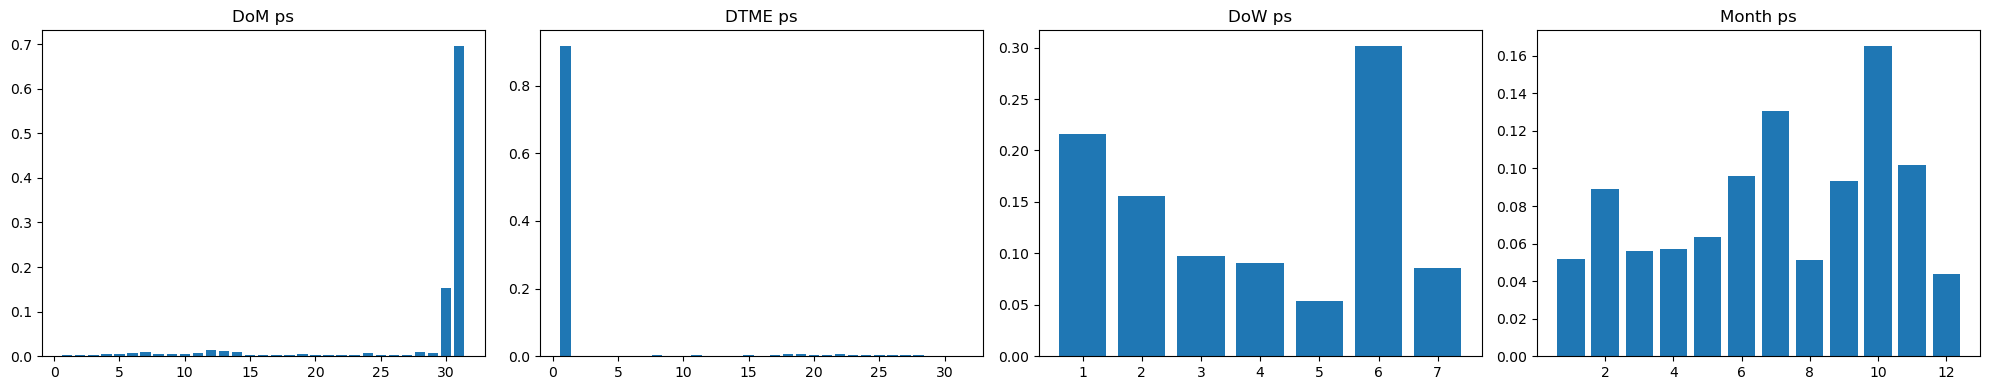

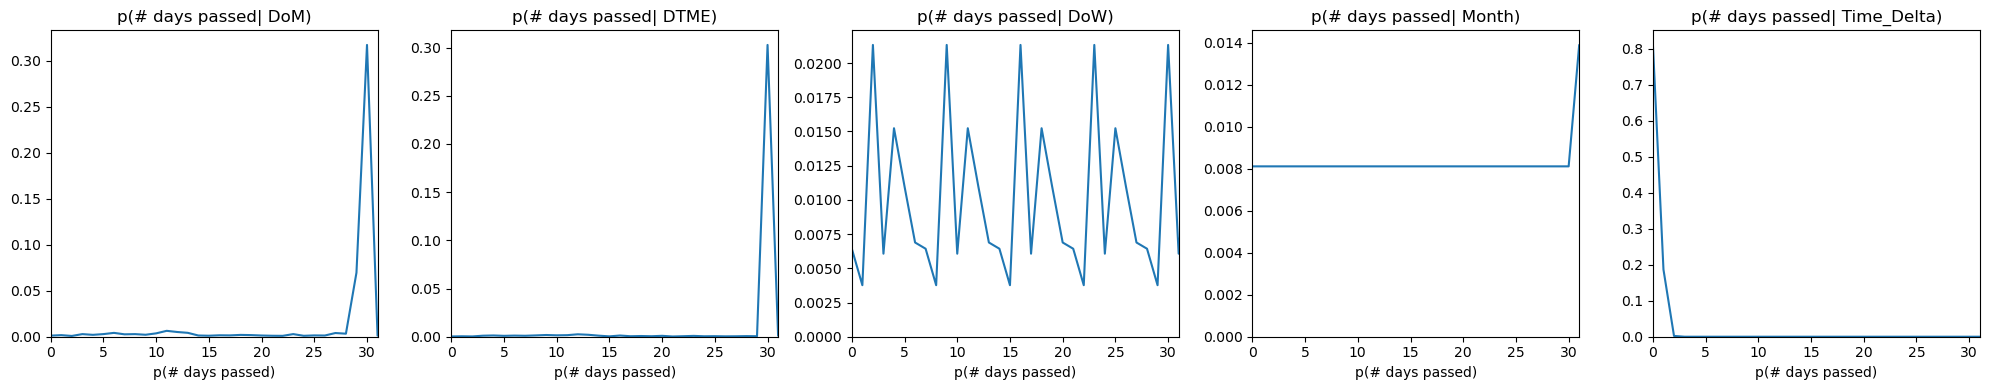

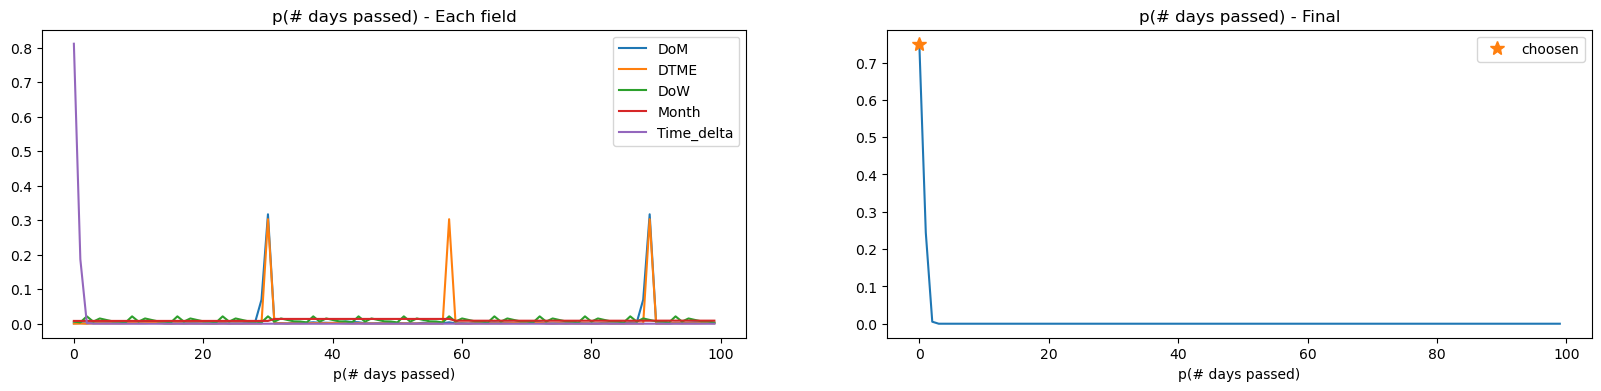

In [77]:
import matplotlib.pyplot as plt
print("*** Generating next date. Current Date is:", ALL_DATES[si], i)
print("\n")

fig, ax = plt.subplots(1,4, figsize=(20,4))
ax[0].bar(np.arange(len(day_ps))+1, day_ps)
ax[1].bar(np.arange(len(dtme_ps))+1, dtme_ps)
ax[2].bar(np.arange(len(dow_ps))+1, dow_ps)
ax[3].bar(np.arange(len(month_ps))+1, month_ps)

for axi, lbl in enumerate(['DoM', 'DTME', 'DoW', 'Month']): 
    ax[axi].set_title(f"{lbl} ps")

plt.tight_layout()
plt.show()

######    Individual predictions - # days passed    ######
        
fig, ax = plt.subplots(1,5, figsize=(20,4))

ii = 0

for lbl, vals in zip(['DoM', 'DTME', 'DoW', 'Month','Time_Delta'], 
                    [day_ps[AD[si:si+max_days,1]], dtme_ps[AD[si:si+max_days,-1]], dow_ps[AD[si:si+max_days,2]],month_ps[AD[si:si+max_days,0]], td_ps]):   

    ax[ii].set_xlabel("p(# days passed)")

    to_plot = vals/sum(vals)
    ax[ii].plot(to_plot)
    ax[ii].set_xlim([0, 31])
    ax[ii].set_ylim([0.0, np.max(to_plot)*1.05 ])
    ax[ii].set_title(f"p(# days passed| {lbl})")
    # ax[ii].set_xlabel("p(day until next)")

    # print("Len of", lbl, "is", len(vals))
    ii +=1

plt.tight_layout()
plt.show()


###########################################################################
greedy_decode = False
ps = month_ps[AD[si:si+max_days,0]]*day_ps[AD[si:si+max_days,1]]*dow_ps[AD[si:si+max_days,2]] *dtme_ps[AD[si:si+max_days,-1]] * td_ps
if greedy_decode:
    timesteps = np.argmax(ps)
else:
    timesteps = np.random.choice(max_days, p=ps/sum(ps))

        
######    Combined predictions - # days passed    ######

fig, ax = plt.subplots(1,2, figsize=(20,4))

ii = 0

ax[1].plot(ps/sum(ps))
ax[1].set_xlabel("p(# days passed)")

ax[0].set_title(f"p(# days passed) - Each field")
ax[1].set_title(f"p(# days passed) - Final")


ax[1].plot(timesteps, np.max(ps/sum(ps)), "*", label="choosen", markersize = 10)

for lbl, vals in zip(['DoM', 'DTME', 'DoW', 'Month', "Time_delta"], 
                      [day_ps[AD[si:si+max_days,1]], dtme_ps[AD[si:si+max_days,-1]], dow_ps[AD[si:si+max_days,2]],month_ps[AD[si:si+max_days,0]],td_ps]):   
    
    ax[0].set_xlabel("p(# days passed)")
    ax[0].plot(vals/sum(vals), label=lbl)
    

    ii +=1

ax[0].legend()
ax[1].legend()
# plt.legend
plt.show()


In [78]:
si = 0
ALL_DATES[timesteps + si]

Timestamp('1993-01-01 00:00:00')

In [79]:
recovered_data['timesteps'] = ALL_DATES[timesteps + si]

In [80]:
recovered_data

,amount,tcode,td,timesteps
0,-177.602768,CREDIT__nan__INTEREST CREDITED,-0.015306,1993-01-01


In [81]:
si = timesteps + si

In [82]:
si

0

## generate next date

In [83]:
cond = np.zeros((1, sampler._n_categories), dtype='float32')
i = 1          # i changes in a loop, i=0 is the first row
row_idx = i + first_row     
col_idx = 0   #column index for tcode
matrix_st = sampler._discrete_column_matrix_indexes[col_idx]             #corrected by myself
matrix_ed = matrix_st + sampler._discrete_column_n_category[col_idx]
pick = np.argmax(sampler.transactions[idx][row_idx, matrix_st:matrix_ed])
cond[0, pick + sampler._discrete_column_cond_st[col_idx]] = 1
condvec = cond

In [84]:
length_of_seq = 1
mean = tf.zeros(shape=(length_of_seq, train._embedding_dim), dtype=tf.float32)
std = mean + 1
fakez = tf.random.normal(shape=(length_of_seq, train._embedding_dim), mean=mean, stddev=std)

In [85]:
c1 = condvec
c1 = tf.convert_to_tensor(np.array(c1))
c1 = tf.cast(c1, dtype=tf.float32)
fakez = tf.concat([fakez, c1], axis=1)

In [86]:
fake = train.generator(fakez)

In [87]:
data_t = []
st = 0
for column_info in train._transformer.output_info_list:
    for span_info in column_info:
        if span_info.activation_fn == 'tanh':
            ed = st + span_info.dim
            data_t.append(tf.math.tanh(fake[:, st:ed]))
            st = ed
        elif span_info.activation_fn == 'softmax':
            ed = st + span_info.dim
            transformed = tf.nn.softmax(fake[:, st:ed])
            data_t.append(transformed)
            st = ed
        else:
            raise ValueError(f'Unexpected activation function {span_info.activation_fn}.')

fakeact = tf.concat(data_t, axis=1)


In [88]:
data = fakeact

In [89]:
sigmas=None
st = 0
recovered_column_data_list = []
column_names = []
for column_transform_info in transformer._column_transform_info_list:
    dim = column_transform_info.output_dimensions
    column_data = data[:, st:st + dim]
    if column_transform_info.column_name == 'amount':
        recovered_column_data = transformer._inverse_transform_continuous(column_transform_info, column_data,sigmas, st)
        recovered_column_data_list.append(recovered_column_data)
        column_names.append(column_transform_info.column_name)
    elif  column_transform_info.column_name == 'tcode':  
        recovered_column_data = transformer._inverse_transform_discrete(column_transform_info, column_data)
        recovered_column_data_list.append(recovered_column_data)
        column_names.append(column_transform_info.column_name)
    elif column_transform_info.column_name == 'month': 
        month_ps_raw = column_data
        ohe = column_transform_info.transform
        month_ps = date_ps(ohe, month_ps_raw)
    elif column_transform_info.column_name == 'day': 
        day_ps_raw = column_data
        ohe = column_transform_info.transform
        day_ps = date_ps(ohe, day_ps_raw)
    elif column_transform_info.column_name == 'dow': 
        dow_ps_raw = column_data
        ohe = column_transform_info.transform
        dow_ps = date_ps(ohe, dow_ps_raw)
    elif column_transform_info.column_name == 'dtme': 
        dtme_ps_raw = column_data
        ohe = column_transform_info.transform
        dtme_ps = date_ps(ohe, dtme_ps_raw)
    elif column_transform_info.column_name == 'td':
        gm = column_transform_info.transform
        td_raw = column_data
        #gaussian_component = np.argmax(td_raw[:, 1:], axis=1)[0]
        recovered_column_data = transformer._inverse_transform_continuous(column_transform_info, column_data,sigmas, st)
        recovered_column_data_list.append(recovered_column_data)
        column_names.append(column_transform_info.column_name)
        
    st += dim
recovered_data2 = np.column_stack(recovered_column_data_list)
recovered_data2 = (pd.DataFrame(recovered_data2, columns=column_names).astype(transformer._column_raw_dtypes.loc[['amount','tcode']]))

In [90]:
recovered_data2

,amount,tcode,td
0,853.315796,DEBIT__CASH WITHDRAWAL__nan,0.741091


In [91]:
gaussian_component = np.argmax(td_raw[:, 1:], axis=1)[0]

mean = mean_dict[gaussian_component]
std = std_dict[gaussian_component]

In [92]:
def make_bar_plt(vals, ax = None):
    
    if ax is None:
        plt.bar(np.arange(len(vals))+1, vals)
        
    else:
        ax.bar(np.arange(len(vals))+1, vals)

*** Generating next date. Current Date is: 1993-01-01 00:00:00 1




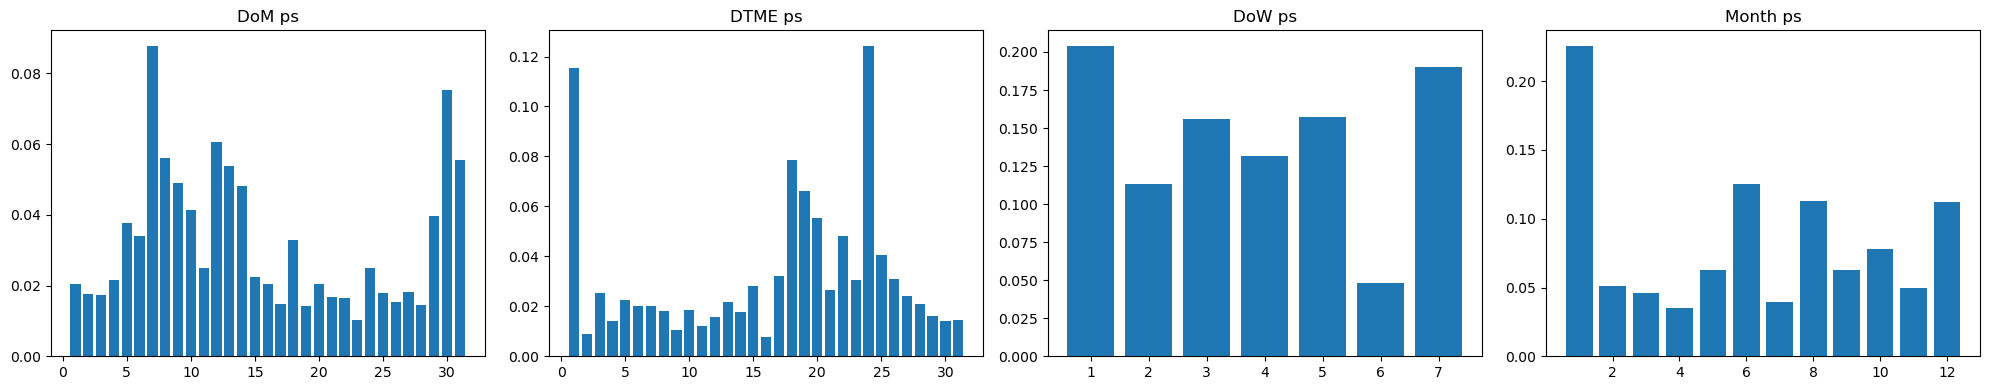

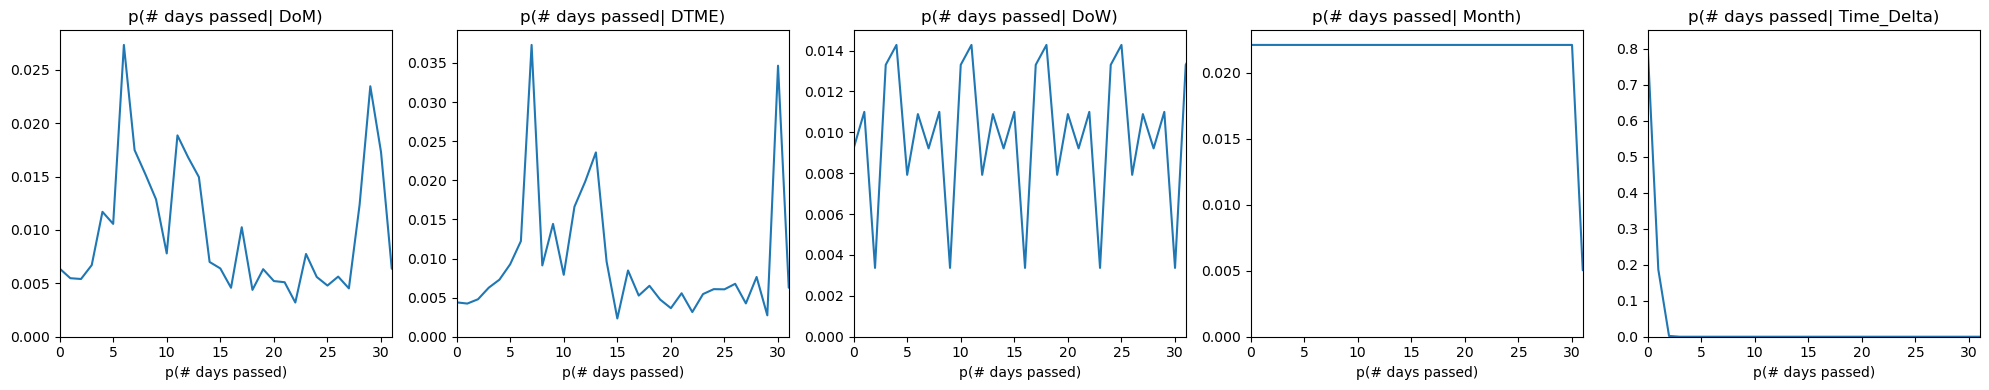

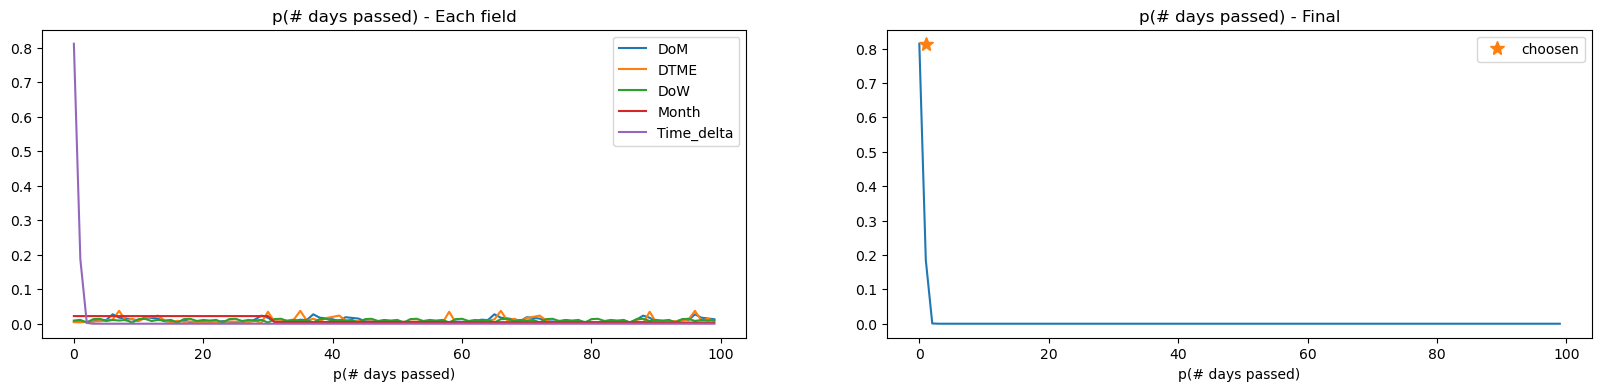

In [94]:
import matplotlib.pyplot as plt
print("*** Generating next date. Current Date is:", ALL_DATES[si], i)
print("\n")

fig, ax = plt.subplots(1,4, figsize=(20,4))

make_bar_plt(day_ps, ax[0])
make_bar_plt(dtme_ps, ax[1])
make_bar_plt(dow_ps, ax[2])
make_bar_plt(month_ps, ax[3])

for axi, lbl in enumerate(['DoM', 'DTME', 'DoW', 'Month']): 
    ax[axi].set_title(f"{lbl} ps")

plt.tight_layout()
plt.show()

######    Individual predictions - # days passed    ######
        
fig, ax = plt.subplots(1,5, figsize=(20,4))

ii = 0

for lbl, vals in zip(['DoM', 'DTME', 'DoW', 'Month','Time_Delta'], 
                    [day_ps[AD[si:si+max_days,1]], dtme_ps[AD[si:si+max_days,-1]], dow_ps[AD[si:si+max_days,2]],month_ps[AD[si:si+max_days,0]], td_ps]):   

    ax[ii].set_xlabel("p(# days passed)")

    to_plot = vals/sum(vals)
    ax[ii].plot(to_plot)
    ax[ii].set_xlim([0, 31])
    ax[ii].set_ylim([0.0, np.max(to_plot)*1.05 ])
    ax[ii].set_title(f"p(# days passed| {lbl})")
    # ax[ii].set_xlabel("p(day until next)")

    # print("Len of", lbl, "is", len(vals))
    ii +=1

plt.tight_layout()
plt.show()


###########################################################################
greedy_decode = False
ps = month_ps[AD[si:si+max_days,0]]*day_ps[AD[si:si+max_days,1]]*dow_ps[AD[si:si+max_days,2]] *dtme_ps[AD[si:si+max_days,-1]] * td_ps
if greedy_decode:
    timesteps = np.argmax(ps)
else:
    timesteps = np.random.choice(max_days, p=ps/sum(ps))

        
######    Combined predictions - # days passed    ######

fig, ax = plt.subplots(1,2, figsize=(20,4))

ii = 0

ax[1].plot(ps/sum(ps))
ax[1].set_xlabel("p(# days passed)")

ax[0].set_title(f"p(# days passed) - Each field")
ax[1].set_title(f"p(# days passed) - Final")


ax[1].plot(timesteps, np.max(ps/sum(ps)), "*", label="choosen", markersize = 10)

for lbl, vals in zip(['DoM', 'DTME', 'DoW', 'Month', "Time_delta"], 
                      [day_ps[AD[si:si+max_days,1]], dtme_ps[AD[si:si+max_days,-1]], dow_ps[AD[si:si+max_days,2]],month_ps[AD[si:si+max_days,0]],td_ps]):   
    
    ax[0].set_xlabel("p(# days passed)")
    ax[0].plot(vals/sum(vals), label=lbl)
    

    ii +=1

ax[0].legend()
ax[1].legend()
# plt.legend
plt.show()


In [95]:
timesteps

1

In [96]:
recovered_data2['timesteps'] = ALL_DATES[timesteps + si]

In [97]:
recovered_data2

,amount,tcode,td,timesteps
0,853.315796,DEBIT__CASH WITHDRAWAL__nan,0.741091,1993-01-02


In [98]:
pd.concat([recovered_data, recovered_data2], axis=0)

,amount,tcode,td,timesteps
0,-177.602768,CREDIT__nan__INTEREST CREDITED,-0.015306,1993-01-01
0,853.315796,DEBIT__CASH WITHDRAWAL__nan,0.741091,1993-01-02


In [99]:
si = si + timesteps

In [100]:
si

1

## generate third transaction

In [101]:
cond = np.zeros((1, sampler._n_categories), dtype='float32')
i = 2         # i changes in a loop, i=0 is the first row
row_idx = i + first_row     
col_idx = 0   #column index for tcode
matrix_st = sampler._discrete_column_matrix_indexes[col_idx]             #corrected by myself
matrix_ed = matrix_st + sampler._discrete_column_n_category[col_idx]
pick = np.argmax(sampler.transactions[idx][row_idx, matrix_st:matrix_ed])
cond[0, pick + sampler._discrete_column_cond_st[col_idx]] = 1
condvec = cond

In [102]:
length_of_seq = 1
mean = tf.zeros(shape=(length_of_seq, train._embedding_dim), dtype=tf.float32)
std = mean + 1
fakez = tf.random.normal(shape=(length_of_seq, train._embedding_dim), mean=mean, stddev=std)

In [103]:
c1 = condvec
c1 = tf.convert_to_tensor(np.array(c1))
c1 = tf.cast(c1, dtype=tf.float32)
fakez = tf.concat([fakez, c1], axis=1)

In [104]:
fake = train.generator(fakez)

In [105]:
data_t = []
st = 0
for column_info in train._transformer.output_info_list:
    for span_info in column_info:
        if span_info.activation_fn == 'tanh':
            ed = st + span_info.dim
            data_t.append(tf.math.tanh(fake[:, st:ed]))
            st = ed
        elif span_info.activation_fn == 'softmax':
            ed = st + span_info.dim
            transformed = tf.nn.softmax(fake[:, st:ed])
            data_t.append(transformed)
            st = ed
        else:
            raise ValueError(f'Unexpected activation function {span_info.activation_fn}.')

fakeact = tf.concat(data_t, axis=1)


In [106]:
data = fakeact

In [107]:
sigmas=None
st = 0
recovered_column_data_list = []
column_names = []
for column_transform_info in transformer._column_transform_info_list:
    dim = column_transform_info.output_dimensions
    column_data = data[:, st:st + dim]
    if column_transform_info.column_name == 'amount':
        recovered_column_data = transformer._inverse_transform_continuous(column_transform_info, column_data,sigmas, st)
        recovered_column_data_list.append(recovered_column_data)
        column_names.append(column_transform_info.column_name)
    elif  column_transform_info.column_name == 'tcode':  
        recovered_column_data = transformer._inverse_transform_discrete(column_transform_info, column_data)
        recovered_column_data_list.append(recovered_column_data)
        column_names.append(column_transform_info.column_name)
    elif column_transform_info.column_name == 'month': 
        month_ps_raw = column_data
        ohe = column_transform_info.transform
        month_ps = date_ps(ohe, month_ps_raw)
    elif column_transform_info.column_name == 'day': 
        day_ps_raw = column_data
        ohe = column_transform_info.transform
        day_ps = date_ps(ohe, day_ps_raw)
    elif column_transform_info.column_name == 'dow': 
        dow_ps_raw = column_data
        ohe = column_transform_info.transform
        dow_ps = date_ps(ohe, dow_ps_raw)
    elif column_transform_info.column_name == 'dtme': 
        dtme_ps_raw = column_data
        ohe = column_transform_info.transform
        dtme_ps = date_ps(ohe, dtme_ps_raw)
    elif column_transform_info.column_name == 'td':
        gm = column_transform_info.transform
        td_raw = column_data
        #gaussian_component = np.argmax(td_raw[:, 1:], axis=1)[0]
        recovered_column_data = transformer._inverse_transform_continuous(column_transform_info, column_data,sigmas, st)
        recovered_column_data_list.append(recovered_column_data)
        column_names.append(column_transform_info.column_name)
        
    st += dim
recovered_data3 = np.column_stack(recovered_column_data_list)
recovered_data3 = (pd.DataFrame(recovered_data3, columns=column_names).astype(transformer._column_raw_dtypes.loc[['amount','tcode']]))

In [108]:
recovered_data3

,amount,tcode,td
0,-29.775299,CREDIT__nan__INTEREST CREDITED,0.011942


In [109]:
gaussian_component = np.argmax(td_raw[:, 1:], axis=1)[0]

mean = mean_dict[gaussian_component]
std = std_dict[gaussian_component]

*** Generating next date. Current Date is: 1993-01-02 00:00:00 2




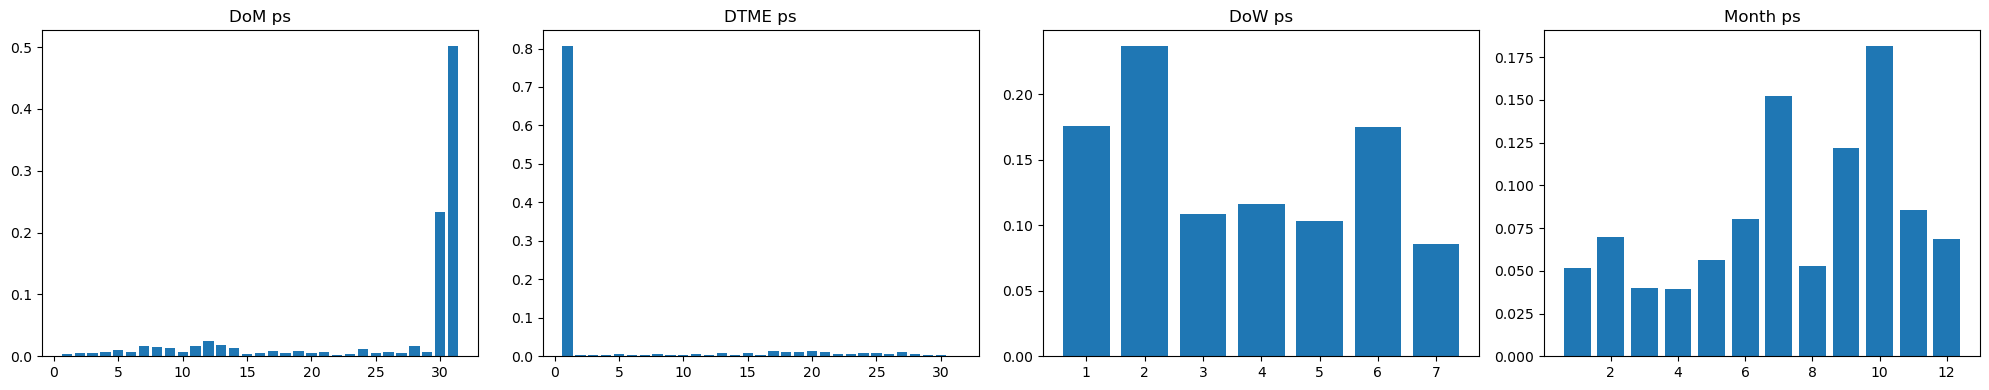

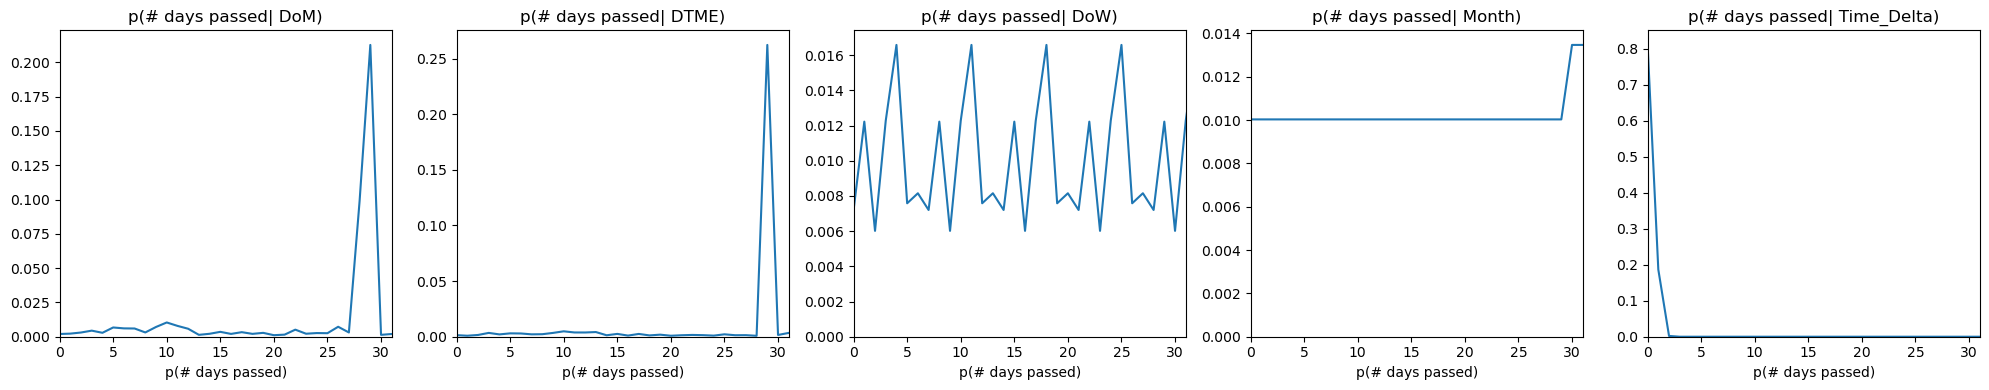

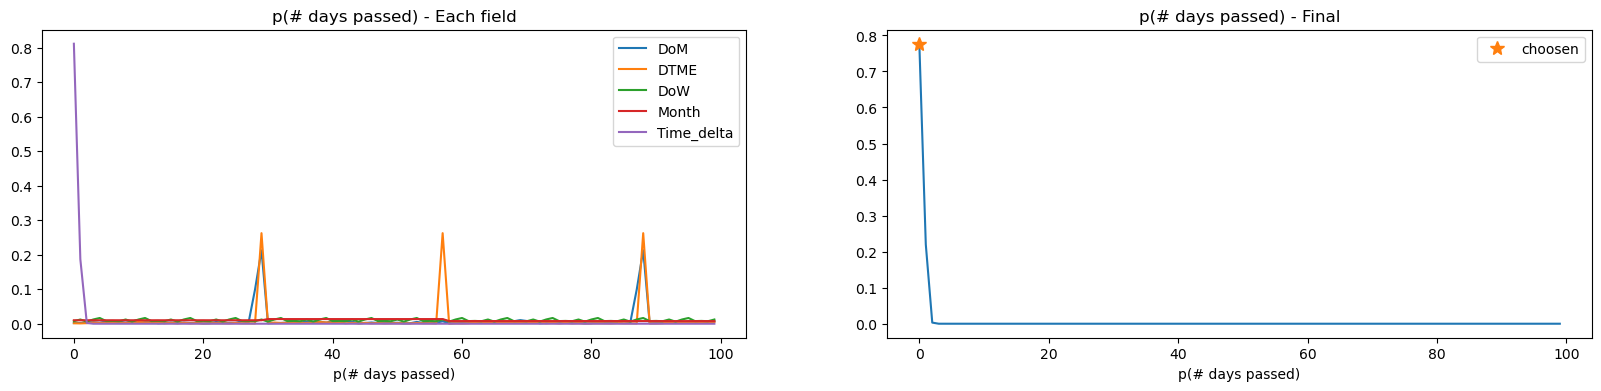

In [110]:
import matplotlib.pyplot as plt
print("*** Generating next date. Current Date is:", ALL_DATES[si], i)
print("\n")

fig, ax = plt.subplots(1,4, figsize=(20,4))

make_bar_plt(day_ps, ax[0])
make_bar_plt(dtme_ps, ax[1])
make_bar_plt(dow_ps, ax[2])
make_bar_plt(month_ps, ax[3])

for axi, lbl in enumerate(['DoM', 'DTME', 'DoW', 'Month']): 
    ax[axi].set_title(f"{lbl} ps")

plt.tight_layout()
plt.show()

######    Individual predictions - # days passed    ######
        
fig, ax = plt.subplots(1,5, figsize=(20,4))

ii = 0

for lbl, vals in zip(['DoM', 'DTME', 'DoW', 'Month','Time_Delta'], 
                    [day_ps[AD[si:si+max_days,1]], dtme_ps[AD[si:si+max_days,-1]], dow_ps[AD[si:si+max_days,2]],month_ps[AD[si:si+max_days,0]], td_ps]):   

    ax[ii].set_xlabel("p(# days passed)")

    to_plot = vals/sum(vals)
    ax[ii].plot(to_plot)
    ax[ii].set_xlim([0, 31])
    ax[ii].set_ylim([0.0, np.max(to_plot)*1.05 ])
    ax[ii].set_title(f"p(# days passed| {lbl})")
    # ax[ii].set_xlabel("p(day until next)")

    # print("Len of", lbl, "is", len(vals))
    ii +=1

plt.tight_layout()
plt.show()


###########################################################################
greedy_decode = False
ps = month_ps[AD[si:si+max_days,0]]*day_ps[AD[si:si+max_days,1]]*dow_ps[AD[si:si+max_days,2]] *dtme_ps[AD[si:si+max_days,-1]] * td_ps
if greedy_decode:
    timesteps = np.argmax(ps)
else:
    timesteps = np.random.choice(max_days, p=ps/sum(ps))

        
######    Combined predictions - # days passed    ######

fig, ax = plt.subplots(1,2, figsize=(20,4))

ii = 0

ax[1].plot(ps/sum(ps))
ax[1].set_xlabel("p(# days passed)")

ax[0].set_title(f"p(# days passed) - Each field")
ax[1].set_title(f"p(# days passed) - Final")


ax[1].plot(timesteps, np.max(ps/sum(ps)), "*", label="choosen", markersize = 10)

for lbl, vals in zip(['DoM', 'DTME', 'DoW', 'Month', "Time_delta"], 
                      [day_ps[AD[si:si+max_days,1]], dtme_ps[AD[si:si+max_days,-1]], dow_ps[AD[si:si+max_days,2]],month_ps[AD[si:si+max_days,0]],td_ps]):   
    
    ax[0].set_xlabel("p(# days passed)")
    ax[0].plot(vals/sum(vals), label=lbl)
    

    ii +=1

ax[0].legend()
ax[1].legend()
# plt.legend
plt.show()


In [111]:
timesteps

0

In [112]:
ALL_DATES[si+timesteps]

Timestamp('1993-01-02 00:00:00')

In [25]:
transformer._column_transform_info_list

[ColumnTransformInfo(column_name='amount', column_type='continuous', transform=ClusterBasedNormalizer(model_missing_values=True), output_info=[SpanInfo(dim=1, activation_fn='tanh'), SpanInfo(dim=9, activation_fn='softmax')], output_dimensions=10),
 ColumnTransformInfo(column_name='tcode', column_type='discrete', transform=OneHotEncoder(), output_info=[SpanInfo(dim=16, activation_fn='softmax')], output_dimensions=16),
 ColumnTransformInfo(column_name='td', column_type='continuous', transform=ClusterBasedNormalizer(model_missing_values=True), output_info=[SpanInfo(dim=1, activation_fn='tanh'), SpanInfo(dim=8, activation_fn='softmax')], output_dimensions=9),
 ColumnTransformInfo(column_name='day', column_type='discrete', transform=OneHotEncoder(), output_info=[SpanInfo(dim=31, activation_fn='softmax')], output_dimensions=31),
 ColumnTransformInfo(column_name='dow', column_type='discrete', transform=OneHotEncoder(), output_info=[SpanInfo(dim=7, activation_fn='softmax')], output_dimensions=

In [3]:
import json
experiment_name = 'ctbank2'
filename_vis = '../DATA/'+ experiment_name + '_vis' + '.json'
with open(filename_vis, 'r') as f:
    loaded_list_of_dicts = json.load(f)

In [5]:
import pickle
with open('../DATA/ctbank2_vis.pickle', 'rb') as f:
    loaded_list_of_dicts = pickle.load(f)

In [6]:
loaded_list_of_dicts

,amount,tcode,td,date,account_id
0,-12.497414,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,17.537415,1998-08-31,0
0,66.111229,DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD,11.034449,1998-09-13,0
0,3406.340088,DEBIT__CASH WITHDRAWAL__nan,6.388572,1998-09-20,0
0,622.517334,DEBIT__REMITTANCE TO ANOTHER BANK__,11.104388,1998-09-30,0
0,3021.188477,CREDIT__CREDIT IN CASH__nan,6.628861,1998-10-07,0
...,...,...,...,...,...
0,-18.778023,DEBIT__CASH WITHDRAWAL__SANCTION INTEREST,11.799686,1998-09-18,1
0,3518.587402,DEBIT__CASH WITHDRAWAL__nan,7.255607,1998-09-23,1
0,9.465149,DEBIT__CASH WITHDRAWAL__SANCTION INTEREST,16.616018,1998-09-30,1
0,2816.799316,DEBIT__CASH WITHDRAWAL__nan,3.710386,1998-10-07,1


In [2]:
import matplotlib.pyplot as plt
max_days = 100
for i in range(2):
    si = loaded_list_of_dicts[i]['si']
    day_ps = np.array(loaded_list_of_dicts[i]['day_ps'])
    # Add more variables as needed
    dtme_ps = np.array(loaded_list_of_dicts[i]['dtme_ps'])
    dow_ps = np.array(loaded_list_of_dicts[i]['dow_ps'])
    month_ps = np.array(loaded_list_of_dicts[i]['month_ps'])
    td_ps = np.array(loaded_list_of_dicts[i]['td_ps'])
    account_id = loaded_list_of_dicts[i]['account_id']
    timesteps = loaded_list_of_dicts[i]['timesteps']
    print("*** Generating next date. Current Date is:", ALL_DATES[si], i)
    print("\n")

    fig, ax = plt.subplots(1,4, figsize=(20,4))
    ax[0].bar(np.arange(len(day_ps))+1, day_ps)
    ax[1].bar(np.arange(len(dtme_ps))+1, dtme_ps)
    ax[2].bar(np.arange(len(dow_ps))+1, dow_ps)
    ax[3].bar(np.arange(len(month_ps))+1, month_ps)

    for axi, lbl in enumerate(['DoM', 'DTME', 'DoW', 'Month']): 
        ax[axi].set_title(f"{lbl} ps")

    plt.tight_layout()
    plt.show()

    ######    Individual predictions - # days passed    ######
            
    fig, ax = plt.subplots(1,5, figsize=(20,4))

    ii = 0

    for lbl, vals in zip(['DoM', 'DTME', 'DoW', 'Month','Time_Delta'], 
                        [day_ps[AD[si:si+max_days,1]], dtme_ps[AD[si:si+max_days,-1]], dow_ps[AD[si:si+max_days,2]],month_ps[AD[si:si+max_days,0]], td_ps]):   

        ax[ii].set_xlabel("p(# days passed)")

        to_plot = vals/sum(vals)
        ax[ii].plot(to_plot)
        ax[ii].set_xlim([0, 31])
        ax[ii].set_ylim([0.0, np.max(to_plot)*1.05 ])
        ax[ii].set_title(f"p(# days passed| {lbl})")
        # ax[ii].set_xlabel("p(day until next)")

        # print("Len of", lbl, "is", len(vals))
        ii +=1

    plt.tight_layout()
    plt.show()


    ###########################################################################
    greedy_decode = False
    ps = month_ps[AD[si:si+max_days,0]]*day_ps[AD[si:si+max_days,1]]*dow_ps[AD[si:si+max_days,2]] *dtme_ps[AD[si:si+max_days,-1]] * td_ps
    if greedy_decode:
        timesteps1 = np.argmax(ps)
    else:
        timesteps1 = np.random.choice(max_days, p=ps/sum(ps))

            
    ######    Combined predictions - # days passed    ######

    fig, ax = plt.subplots(1,2, figsize=(20,4))

    ii = 0

    ax[1].plot(ps/sum(ps))
    ax[1].set_xlabel("p(# days passed)")

    ax[0].set_title(f"p(# days passed) - Each field")
    ax[1].set_title(f"p(# days passed) - Final")


    ax[1].plot(timesteps, np.max(ps/sum(ps)), "*", label="choosen", markersize = 10)

    for lbl, vals in zip(['DoM', 'DTME', 'DoW', 'Month', "Time_delta"], 
                        [day_ps[AD[si:si+max_days,1]], dtme_ps[AD[si:si+max_days,-1]], dow_ps[AD[si:si+max_days,2]],month_ps[AD[si:si+max_days,0]],td_ps]):   
        
        ax[0].set_xlabel("p(# days passed)")
        ax[0].plot(vals/sum(vals), label=lbl)
        

        ii +=1

    ax[0].legend()
    ax[1].legend()
    # plt.legend
    plt.show()


KeyError: 0

In [7]:
loaded_list_of_dicts[1]['day_ps']

1.0000000353902578